# Analyse de système éducatifs

A travers ces différents jeux de données, on va chercher à analyser différents systèmes éducatifs dans le monde pour pouvoir s'exporter à l'internationale et cibler au mieux notre implantation.  
Pour pouvoir établir au mieux notre stratégie, on va rechercher dans nos jeux données différentes informations. Le but est de trouver quelques indications qui vont nous permettre ensuite de choisir les indicateurs nécessaires.

# Import des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.simplefilter(action='ignore', category=FutureWarning)
              
sns.set()

!python --version
print('\n'.join(f'{m.__name__} {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))

Python 3.9.18
pandas 2.1.4
numpy 1.26.2
seaborn 0.12.2


# Import des données

In [2]:
df_country = pd.read_csv('Data/EdStatsCountry.csv')
df_country_series = pd.read_csv('Data/EdStatsCountry-Series.csv')
df_series = pd.read_csv('Data/EdStatsSeries.Csv')
df_footnote = pd.read_csv('Data/EdStatsFootNote.csv')
df_data = pd.read_csv('Data/EdStatsData.csv')

# Nettoyage et préparation des différents jeux de données

## EdStatsCountry.csv

In [3]:
display(df_country.head())

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.000,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.000,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.000,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.000,2012.000,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.000,NaN,NaN


### Nettoyage du jeu de données

In [4]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

La première impression c'est qu'il manque un certain nombre de données selon les colonnes. Il faut également trier pour savoir quelles colonnes on garde ou non. Cela ressemble à un jeu de données où on pourrait garder seulement les pays, et le joindre plus tard à un autre jeu de données. Le soucis c'est qu'il manque des régions/income group, on va vérifier lesquelles.

Sur une autre note, on retrouve également entre autre :
- la monnaie locale
- des informations géographiques sur le pays
- des indicateurs économiques et sociaux des pays.

In [5]:
# Vérification et confirmation de région(s) manquantes(s)
df_country['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [6]:
df_country['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [7]:
df_country['Short Name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',


In [8]:
country_list = [
  'Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 
  'United Arab Emirates', 'Argentina', 'Armenia',
  'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
  'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
  'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas',
  'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
  'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
  'Central African Republic', 'Canada', 'Switzerland',
  'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
  'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde',
  'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus',
  'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
  'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
  'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
  'Finland', 'Fiji', 'France', 'Faeroe Islands',
  'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana',
  'Gibraltar', 'Guinea', 'The Gambia', 'Guinea-Bissau',
  'Equatorial Guinea', 'Greece', 'Grenada', 'Greenland', 'Guatemala',
  'Guam', 'Guyana', 'Hong Kong SAR, China',
  'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Isle of Man', 'India', 'Ireland',
  'Iran', 'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan',
  'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Cambodia',
  'Kiribati', 'St. Kitts and Nevis', 'Korea', 'Kuwait','Lao PDR',
  'Lebanon', 'Liberia', 'Libya', 'St. Lucia', 'Liechtenstein', 'Sri Lanka',
  'Lesotho', 'Lithuania', 'Luxembourg',
  'Latvia', 'Macao SAR, China', 'St. Martin (French part)',
  'Morocco', 'Monaco', 'Moldova', 'Madagascar', 'Maldives','Mexico',
  'Marshall Islands','Macedonia', 'Mali', 'Malta',
  'Myanmar', 'Montenegro', 'Mongolia', 'Northern Mariana Islands', 'Mozambique',
  'Mauritania', 'Mauritius', 'Malawi', 'Malaysia',
  'Namibia', 'New Caledonia', 'Niger', 'Nigeria', 'Nicaragua',
  'Netherlands', 'Norway', 'Nepal', 'Nauru', 'New Zealand',
  'Oman', 'Pakistan', 'Panama', 'Peru',
  'Philippines', 'Palau', 'Papua New Guinea', 'Poland',
  'Puerto Rico', "Dem. People's Rep. Korea", 'Portugal', 'Paraguay',
  'French Polynesia', 'Qatar', 'Romania',
  'Russia', 'Rwanda','Saudi Arabia', 'Sudan',
  'Senegal', 'Singapore', 'Solomon Islands', 'Sierra Leone',
  'El Salvador', 'San Marino', 'Somalia', 'Serbia', 'South Sudan','São Tomé and Principe',
  'Suriname', 'Slovak Republic', 'Slovenia', 'Sweden', 'Swaziland',
  'Sint Maarten (Dutch part)', 'Seychelles', 'Syrian Arab Republic',
  'Turks and Caicos Islands', 'Chad', 'Togo', 'Thailand',
  'Tajikistan', 'Turkmenistan', 'Timor-Leste', 'Tonga',
  'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tuvalu', 'Tanzania',
  'Uganda', 'Ukraine', 'Uruguay',
  'United States', 'Uzbekistan', 'St. Vincent and the Grenadines',
  'Venezuela', 'Virgin Islands', 'Vietnam', 'Vanuatu',
  'Samoa', 'Kosovo', 'Yemen', 'South Africa', 'Zambia', 'Zimbabwe']

In [9]:
df_country.duplicated().sum()

0

In [10]:
df_country = df_country[['Country Code', 'Region', 'Income Group']]
df_country

,Country Code,Region,Income Group
0,ABW,Latin America & Caribbean,High income: nonOECD
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Upper middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income: nonOECD
...,...,...,...
236,XKX,Europe & Central Asia,Lower middle income
237,YEM,Middle East & North Africa,Lower middle income
238,ZAF,Sub-Saharan Africa,Upper middle income
239,ZMB,Sub-Saharan Africa,Lower middle income


Pour commencer, partons du principe que nous allons garder seulement ces informations pour ce jeu de données. 
On note tout de même des valeurs nulles avec "Region" et "Income Group". Passons à la suite.

## EdStatsCountrySeries

In [11]:
display(df_country_series.head())

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


### Nettoyage du jeu de données

In [12]:
df_country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


Pour ce jeu de données, on a 4 colonnes, ça s'apparente surtout à de la description. On peut retrouver comme informations :
- le code du pays
- le code de l'indicateur
- la description/source de l'indicateur
- une colonne....vide ?

In [13]:
# Vérification des doublons
df_country_series.duplicated().sum()

0

In [14]:
df_country_series['DESCRIPTION'].unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

In [15]:
df_country_series['SeriesCode'].unique()

array(['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS',
       'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS',
       'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD',
       'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO',
       'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN'],
      dtype=object)

In [16]:
df_country_series['SeriesCode'].nunique()

21

#### Définition des différents indicateurs

On peut voir qu'il y a 21 indicateurs différents. Maintenant, depuis la [source de la world bank](https://databank.worldbank.org/metadataglossary/World-Development-Indicators/series?search=SP.POP.TOTL), on va aller chercher les descriptions des différents indicateurs. Petit lexique pour faciliter les descriptions :


**GDP (Gross Domestic Product) => PIB (Produit Intérieur Brut)** : C'est la valeur totale des biens et services produits à l'intérieur du pays.  

**GNP (Gross National Income) => RNB (Revenu National Brut)** : Le RNB diffère du PIB en ce sens qu'il inclut les revenus provenant de l'étranger et exclut les revenus générés dans le pays mais rapatriés à l'étranger.  

**PCAP (Per Capita) => (Par Habitant)** : Cela signifie que le PIB est divisé par la population totale du pays, donnant ainsi le PIB par habitants.

**PP (Purchasing Power Parity) => PPA (Parité du Pouvoir d'achat)** : Cette mesure permet de comparer les niveaux de vie entre les pays en neutralisant les différences de coûts de vie et de prix des biens et services.

**CD (Current Dollars) => Dollars Courants** : Signifie que l'indicateur est exprimé en dollars américains de l'année en cours, sans ajustement pour l'inflation.

**KD (Constants Dollars) => Dollars Constants** : Cela signifie que les valeurs sont ajustées pour tenir compte de l'inflation et sont exprimées en termes de monnaie internationale qui a le même pouvoir d'achat que le dollar américain.

**Méthode Atlas** : C'est une méthode spécifique utilisée par la Banque mondiale pour calculer les taux de change appliqués dans la conversion des monnaies nationales en dollars américains. Elle prend en compte la moyenne sur trois ans des taux de change, ajustée par la différence entre le taux d'inflation du pays concerné et le taux d'inflation international, afin de minimiser les effets des fluctuations abruptes des taux de change ou de l'inflation sur les revenus nationaux.

-----------------

**SP.POP.TOTL** : Population totale  
**SP.POP.TOTL.FE.ZS** : Population totale chez les femmes (% de la population totale)  
**SP.POP.TOTL.MA.ZS** : Population totale chez les hommes (% de la population totale)  
**SP.POP.GROW** : Croissance de la population (% annuel)  


**SP.POP.0014.FE.IN** : Population dans la tranche 0 à 14 ans chez les femmes  
**SP.POP.0014.MA.IN** : Population dans la tranche 0 à 14 ans chez les hommes  
**SP.POP.0014.TO** : Population totale dans la tranche 0 à 14 ans  
**SP.POP.0014.TO.ZS** : Population totale dans la tranche 0 à 14 ans (% de la population totale)  


**SP.POP.1564.FE.IN** : Population dans la tranche 15 à 64 ans chez les femmes  
**SP.POP.1564.MA.IN** : Population dans la tranche 15 à 64 ans chez les hommes  
**SP.POP.1564.TO** : Population totale dans la tranche 15 à 64 ans  
**SP.POP.1564.TO.ZS** : Population totale dans la tranche 15 à 64 ans (% de la population totale)  
 


**NY.GDP.PCAP.PP.KD** : PIB par habitant, en Parité de Pouvoir d'achat (PP), en dollars internationaux constants de 2011  
**NY.GDP.PCAP.PP.CD** : PIB par habitant, en Parité de Pouvoir d'achat (PP), en dollars internationaux courants  
**NY.GDP.PCAP.KD** : PIB par habitant en dollars constants des États-Unis de 2015  
**NY.GDP.PCAP.CD** : PIB par habitant en dollars américains actuel  


**NY.GNP.PCAP.PP.CD** : RNB par habitant, en parité de pouvoir d'achat (PP), en dollars internationaux courants  
**NY.GNP.PCAP.CD** : RNB par habitant avec la méthode Atlas, en dollars américains courants  


**NY.GDP.MKTP.PP.KD** : PIB, en Parité de Pouvoir d'achat (PP), en dollars internationaux constants de 2017  
**NY.GDP.MKTP.PP.CD** : PIB, en Parité de Pouvoir d'achat (PP), en dollars internationaux courants  
**NY.GNP.MKTP.PP.CD** : RNB, en Parité de Pouvoir d'achat (PP), en dollars internationaux courants  

-----------------

In [17]:
country_series_indicateurs = df_country_series.groupby('SeriesCode')['CountryCode'].count().reset_index()

In [18]:
country_series_indicateurs = country_series_indicateurs.sort_values(by='CountryCode', ascending=False)
country_series_indicateurs

,SeriesCode,CountryCode
18,SP.POP.TOTL,211
17,SP.POP.GROW,211
4,NY.GDP.PCAP.PP.CD,19
5,NY.GDP.PCAP.PP.KD,19
8,NY.GNP.PCAP.PP.CD,19
0,NY.GDP.MKTP.PP.CD,14
6,NY.GNP.MKTP.PP.CD,14
1,NY.GDP.MKTP.PP.KD,14
12,SP.POP.0014.TO.ZS,13
19,SP.POP.TOTL.FE.ZS,13


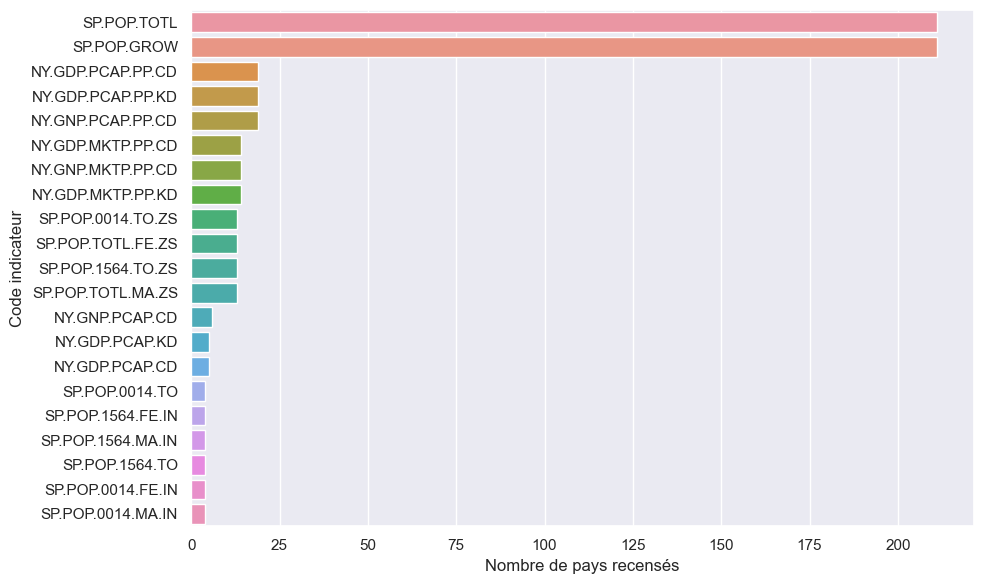

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=country_series_indicateurs['CountryCode'], 
    y=country_series_indicateurs['SeriesCode'], 
    data=country_series_indicateurs)
plt.xlabel('Nombre de pays recensés')
plt.ylabel('Code indicateur')
plt.tight_layout()
plt.show()

In [20]:
country_series_descriptions = df_country_series.groupby(['DESCRIPTION', 'SeriesCode'])['CountryCode'].count().reset_index()

In [21]:
country_series_descriptions = country_series_descriptions.sort_values(by='CountryCode', ascending=False)
country_series_descriptions

,DESCRIPTION,SeriesCode,CountryCode
54,Data sources : United Nations World Population...,SP.POP.TOTL,145
89,Data sources: United Nations World Population ...,SP.POP.GROW,137
20,Data sources : Eurostat,SP.POP.TOTL,28
19,Data sources : Eurostat,SP.POP.GROW,26
102,Estimates are based on regression.,NY.GNP.MKTP.PP.CD,14
...,...,...,...
61,Data sources: Census and Statistics Department,SP.POP.GROW,1
62,Data sources: Central Bureau of Statistics,SP.POP.GROW,1
63,"Data sources: Central Statistics Office, Unite...",SP.POP.GROW,1
64,"Data sources: Croatian Bureau of Statistics, C...",SP.POP.GROW,1


In [22]:
country_series_descriptions_top10 = country_series_descriptions.head(10)

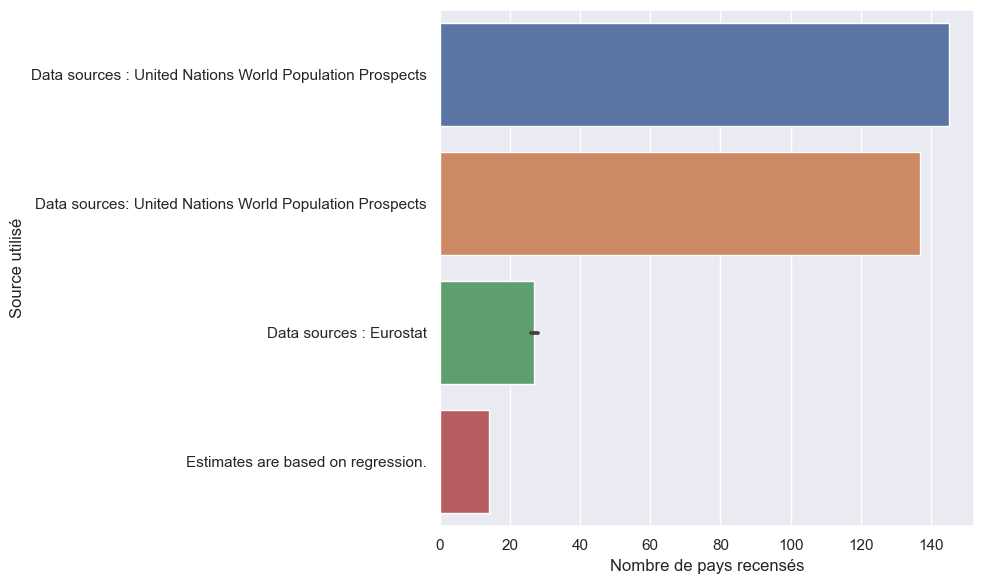

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=country_series_descriptions_top10['CountryCode'], 
    y=country_series_descriptions_top10['DESCRIPTION'], 
    data=country_series_descriptions_top10,
    orient='h')
plt.xlabel('Nombre de pays recensés')
plt.ylabel('Source utilisé')
plt.tight_layout()
plt.show()

## EdStatsSeries

In [24]:
display(df_series.head())

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_series.shape

(3665, 21)

In [26]:
df_series.isnull().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

In [27]:
df_series.nunique()

Series Code                            3665
Topic                                    37
Indicator Name                         3665
Short definition                       1169
Long definition                        2060
Unit of measure                           0
Periodicity                               1
Base Period                               4
Other notes                              14
Aggregation method                        3
Limitations and exceptions                9
Notes from original source                0
General comments                          8
Source                                   31
Statistical concept and methodology       2
Development relevance                     1
Related source links                      1
Other web links                           0
Related indicators                        0
License Type                              0
Unnamed: 20                               0
dtype: int64

In [28]:
df_series.duplicated().sum()

0

In [29]:
# Parcourt toutes les colonnes pour afficher les valeurs uniques et voir plus en détails les potentiels soucis
for col in df_series.columns:
    print(f"Valeurs uniques dans '{col}' : \n{df_series[col].unique()}")
    print("-------------")

Valeurs uniques dans 'Series Code' : 
['BAR.NOED.1519.FE.ZS' 'BAR.NOED.1519.ZS' 'BAR.NOED.15UP.FE.ZS' ...
 'UIS.XUNIT.USCONST.56.FSGOV' 'XGDP.23.FSGOV.FDINSTADM.FFD'
 'XGDP.56.FSGOV.FDINSTADM.FFD']
-------------
Valeurs uniques dans 'Topic' : 
['Attainment' 'Education Equality' 'Infrastructure: Communications'
 'Learning Outcomes'
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators'
 'Economic Policy & Debt: Purchasing power parity'
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
 'Teachers' 'Education Management Information Systems (SABER)'
 'Early Child Development (SABER)' 'Engaging the Private Sector (SABER)'
 'School Health and School Feeding (SABER)'
 'School Autonomy and Accountability (SABER)' 'School Finance (SABER)'
 'Student Assessment (SABER)' 'Teachers (SABER)'
 'Tertiary Education (SABER)' 'Workforce Development (SAB

Au vu des informations de cette liste, on peut en déduire que :

**Series Code** : Code de l'indicateur.  
**Indicator Name** : Nom de l'indicateur en question.  
**Short & Long Definition** : Description des différents indicateurs en version courte ou longue.  
**Topic** : Si on s'en tient au contenu et une traduction, cela ressemble au sujet propre à l'indicateur.  

In [30]:
# On peut déjà regarder comment sont répartis les thèmes selon les indicateurs
series_code_topic = df_series.groupby(['Topic'])[['Series Code']].count().reset_index()
series_code_topic = series_code_topic.sort_values(by="Series Code", ascending=False)
series_code_topic

,Topic,Series Code
19,Learning Outcomes,1046
0,Attainment,733
9,Education Equality,426
28,Secondary,256
24,Primary,248
21,Population,213
34,Tertiary,158
32,Teachers,137
12,Expenditures,93
11,Engaging the Private Sector (SABER),51


In [31]:
# On va récupérer un top qui contient au moins 100 indicateurs pour analyser les topics les plus utilisés.
series_code_topic_top = series_code_topic.head(8)

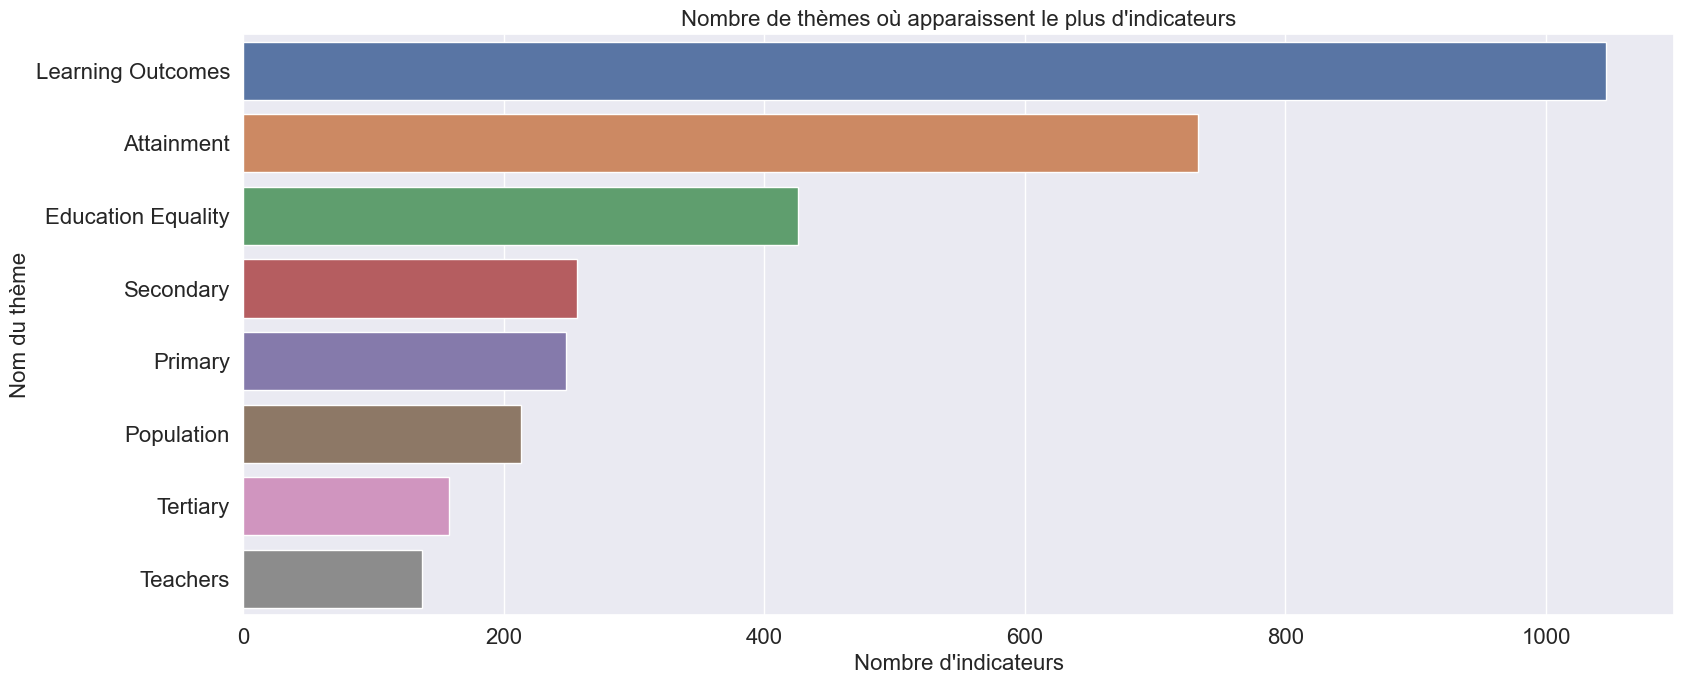

In [32]:
plt.figure(figsize=(17, 7))
sns.barplot(data=series_code_topic_top, x="Series Code", y="Topic", estimator=np.max, errorbar=None)
plt.title("Nombre de thèmes où apparaissent le plus d'indicateurs", fontsize=16)
plt.xlabel("Nombre d'indicateurs", fontsize=16)
plt.ylabel('Nom du thème', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

Analyse des différents thèmes abordés dans ce jeu de données, voici une description pour chaque thème concernant les 10 plus utilisés.  

**Learning Outcomes** : Cet indicateur sert à mettre en valeur le niveau des étudiants en apprentissage de lecture, mathématiques et sciences dans plus de 100 pays.  
**Attainment** : Cela illustre la répartition des niveaux d'éducation atteints et du capital humain dans plus de 100 pays de 1970 à 2010.  
**Education Equality** : Le tableau de bord de l'égalité de l'éducation présente des informations détaillées sur les inégalités de genre, de revenu et géographiques dans l'accès à l'éducation, son achèvement et son niveau d'accomplissement.  
**Secondary** : Taux de scolarisation en établissement secondaire.  
**Primary** : Taux de scolarisation en établissement primaire.  
**Population** : Calcul de la population.  
**Tertiary** : Taux de scolarisation en établissement supérieur.  
**Teachers** : Enseignants.  

## EdStatsFootNote

In [33]:
display(df_footnote.head())

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


### Nettoyage du jeu de données

In [34]:
df_footnote.shape

(643638, 5)

In [35]:
df_footnote.isnull().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

In [36]:
df_footnote.duplicated().sum()

0

In [37]:
df_footnote.describe(include='all')

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
count,643638,643638,643638,643638,0.000
unique,239,1558,56,9102,NaN
top,LIC,SH.DYN.MORT,YR2004,Country Data,NaN
freq,7320,9226,27128,191188,NaN
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN


In [38]:
# Parcourt toutes les colonnes pour afficher les valeurs uniques et voir plus en détails les potentiels soucis
for col in df_footnote.columns:
    print(f"Valeurs uniques dans '{col}' : \n{df_footnote[col].unique()}")
    print("-------------")

Valeurs uniques dans 'CountryCode' : 
['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS'
 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR'
 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI'
 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW'
 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'EAP' 'EAS' 'ECA'
 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST' 'ETH' 'EUU' 'FIN' 'FJI' 'FRA'
 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC'
 'GRD' 'GTM' 'GUM' 'GUY' 'HIC' 'HKG' 'HND' 'HPC' 'HRV' 'HTI' 'HUN' 'IDN'
 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ'
 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR' 'LBY'
 'LCA' 'LCN' 'LDC' 'LIC' 'LIE' 'LKA' 'LMC' 'LMY' 'LSO' 'LTU' 'LUX' 'LVA'
 'MAC' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MIC' 'MKD' 'MLI'
 'MLT' 'MMR' 'MNA' 'MNE' 'MNG' 'MNP' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAC'
 'NAM' 'NCL' 

Après une courte inspection, on peut déduire ces informations sur les colonnes présentes dans ce jeu de données :

- Le CountryCode correspond au code du pays
- Le SeriesCode correspond au code de l'indicateur
- La colonne Year correspond à l'année
- La colonne DESCRIPTION correspond à la source de l'indicateur

On peut aperçevoir également d'une valeur en double(erreur de typo?) concernant l'année 2012. Il va falloir corriger ceci.

In [39]:
df_footnote['Year'] = df_footnote['Year'].replace('yr2012','YR2012')

In [40]:
# On va regarder le nombre de code indicateur utilisé pour chaque pays par année
footnote_year = df_footnote.groupby(['CountryCode', 'Year'])['SeriesCode'].count().reset_index()
footnote_year = footnote_year.sort_values('Year')
footnote_year

,CountryCode,Year,SeriesCode
0,ABW,YR1970,5
7099,MRT,YR1970,6
7147,MUS,YR1970,30
771,BEN,YR1970,6
7202,MWI,YR1970,6
...,...,...,...
7050,MNP,YR2050,1
4545,IMN,YR2050,1
7304,MYS,YR2050,11
674,AZE,YR2050,11


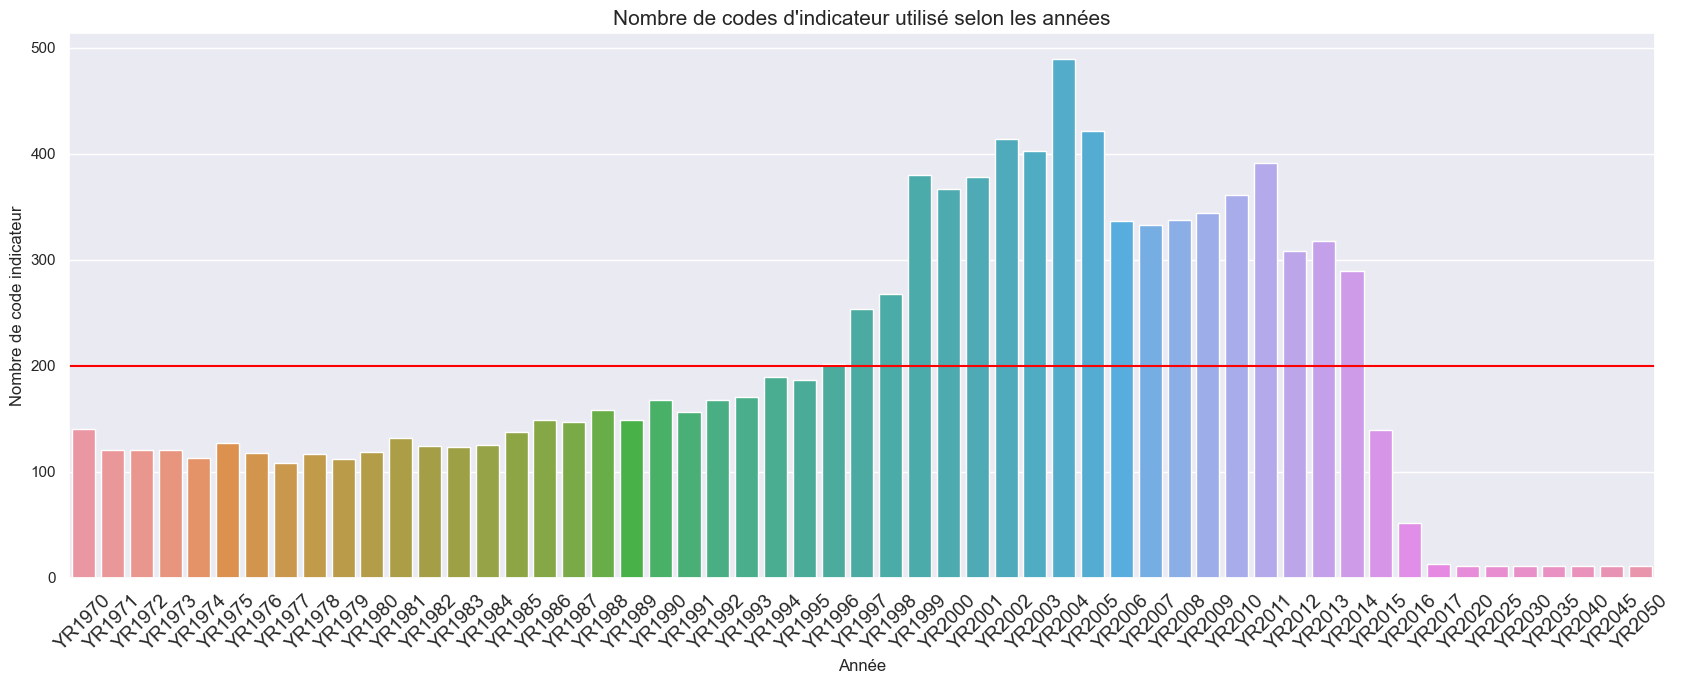

In [41]:
plt.figure(figsize=(17, 7))
sns.barplot(data=footnote_year, x="Year", y="SeriesCode", estimator=np.max, errorbar=None)
plt.xticks(rotation=45)
plt.axhline(200, color="red")
plt.title("Nombre de codes d'indicateur utilisé selon les années", fontsize=15)
plt.xlabel('Année')
plt.ylabel('Nombre de code indicateur')
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

On remarque qu'un nombre significatif de code indicateur est utilisé à partir des années 1997 jusqu'à 2014. Ca peut donner une indication des annéesà étudier pour la suite.

In [42]:
# Maintenant on va plutôt regarder le nombre de pays par rapport à l'année et le code indicateur
footnote_countrycode = df_footnote.groupby(['SeriesCode', 'Year'])['CountryCode'].count().reset_index()
footnote_countrycode = footnote_countrycode.sort_values('Year')
footnote_countrycode

,SeriesCode,Year,CountryCode
0,IT.NET.USER.P2,YR1970,1
20122,UIS.SLE.123.GPI,YR1970,23
3676,SE.PRM.PRSL.FE.ZS,YR1970,9
5110,SE.SEC.ENRL.MA.VO.ZS,YR1970,21
6967,SE.TER.TCHR.FE.ZS,YR1970,20
...,...,...,...
7591,SP.POP.0014.MA.IN,YR2050,11
7866,SP.POP.1564.TO,YR2050,11
7701,SP.POP.0014.TO.ZS,YR2050,12
7811,SP.POP.1564.MA.IN,YR2050,11


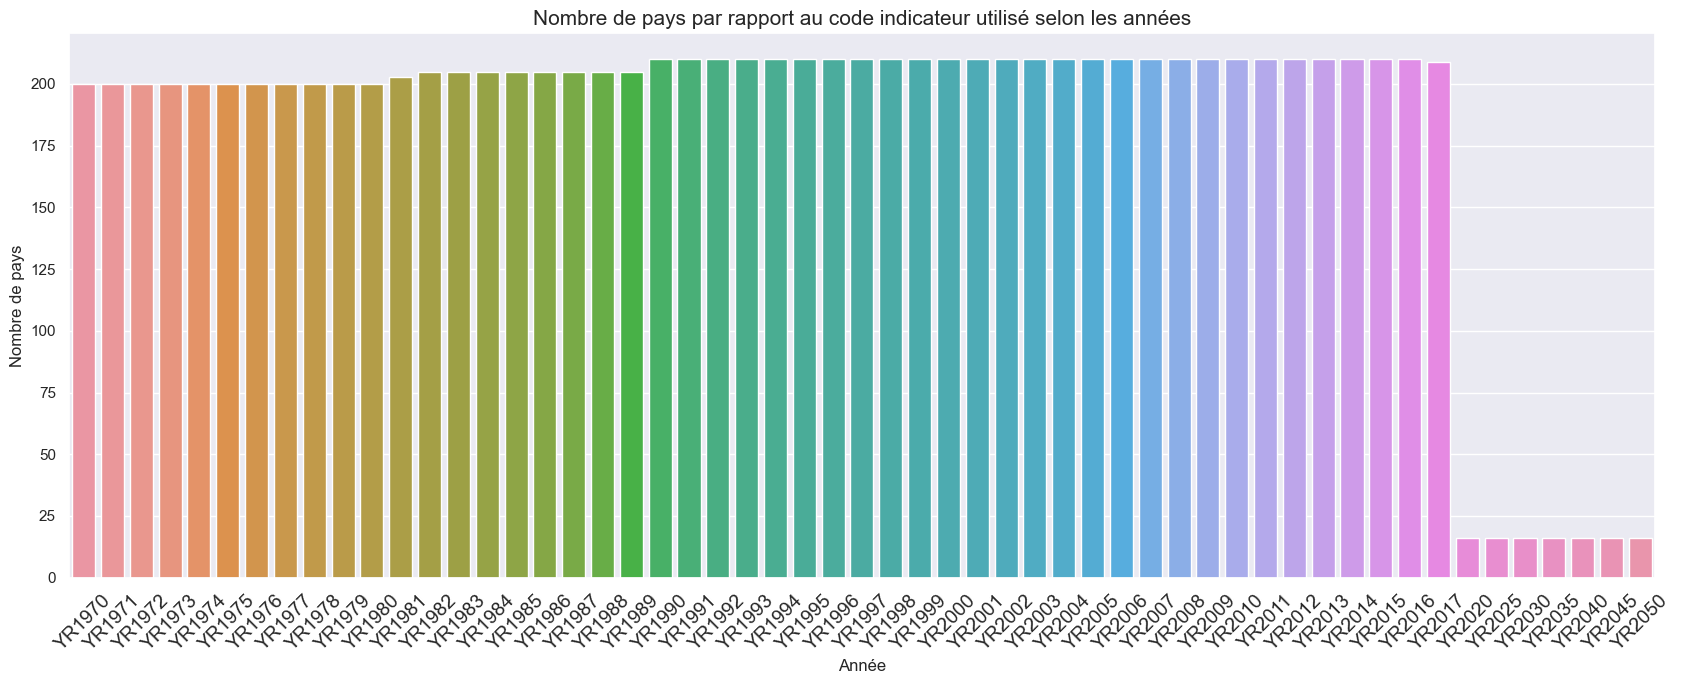

In [43]:
plt.figure(figsize=(17, 7))
sns.barplot(data=footnote_countrycode, x="Year", y="CountryCode", estimator=np.max, errorbar=None)
plt.xticks(rotation=45)
plt.title("Nombre de pays par rapport au code indicateur utilisé selon les années", fontsize=15)
plt.xlabel('Année')
plt.ylabel('Nombre de pays')
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

In [44]:
# Maintenant on va regarder plutôt les sources par rapport aux pays à l'aide de "DESCRIPTION"
footnote_description = df_footnote.groupby(['DESCRIPTION'])[['CountryCode']].nunique().reset_index()
footnote_description = footnote_description.sort_values('CountryCode', ascending=False)
footnote_description

,DESCRIPTION,CountryCode
1276,UNESCO Institute for Statistics (UIS) estimate,232
83,Country Data,232
119,Estimated,222
90,Country estimation.,217
1272,UIS Estimation,209
...,...,...
3328,Uncertainty bound is 165.5 - 191.7,1
3327,Uncertainty bound is 165.5 - 190,1
3326,Uncertainty bound is 165.5 - 186,1
3325,Uncertainty bound is 165.4 - 208.1,1


In [45]:
# On va récupérer un top 5 pour éviter de trop surcharger le prochain graphique à cause de la longueur des textes de "DESCRIPTION"
footnote_description_top = footnote_description.head(5)
footnote_description_top

,DESCRIPTION,CountryCode
1276,UNESCO Institute for Statistics (UIS) estimate,232
83,Country Data,232
119,Estimated,222
90,Country estimation.,217
1272,UIS Estimation,209


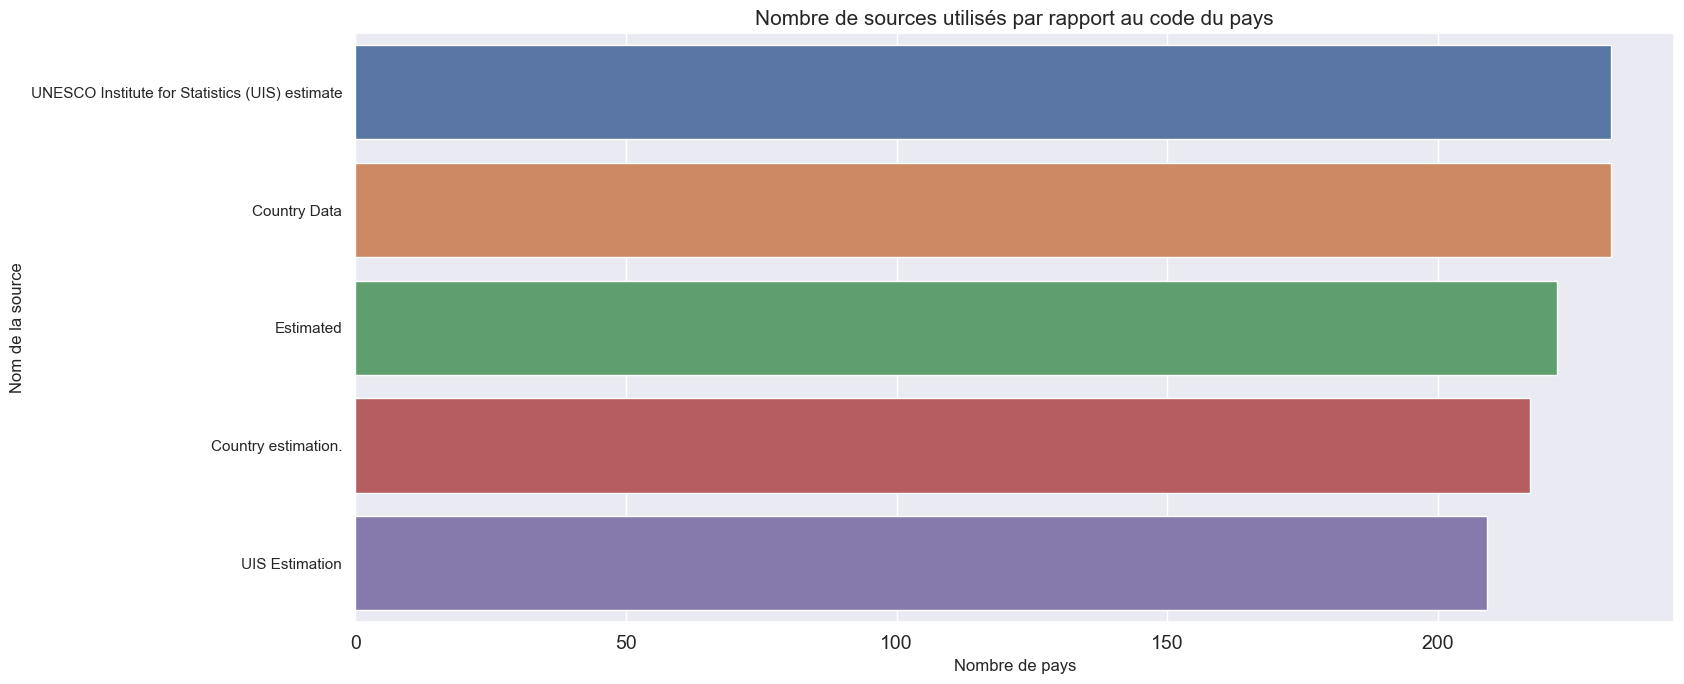

In [46]:
plt.figure(figsize=(17, 7))
sns.barplot(data=footnote_description_top, x="CountryCode", y="DESCRIPTION", errorbar=None)
plt.title("Nombre de sources utilisés par rapport au code du pays", fontsize=15)
plt.xlabel('Nombre de pays')
plt.ylabel('Nom de la source')
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

In [47]:
# Maintenant, répartition des indicateurs selon les pays
footnote_seriescode = df_footnote.groupby(['SeriesCode'])[['CountryCode']].nunique().reset_index()
footnote_seriescode = footnote_seriescode.sort_values('CountryCode', ascending=False)
footnote_seriescode

,SeriesCode,CountryCode
515,SE.PRM.ENRL,231
544,SE.PRM.TCHR,230
567,SE.SEC.ENRL.GC.FE.ZS,230
516,SE.PRM.ENRL.FE,230
518,SE.PRM.ENRL.TC.ZS,229
...,...,...
1429,UIS.XGDP.0.FSgov,1
1430,UIS.XGDP.1.FSGOV,1
708,UIS.AFR.NTP.3.PU.F,1
707,UIS.AFR.NTP.2.PU.T,1


In [48]:
# On va récupérer un top 10 pour analyser les indicateurs les plus utilisés et trouver leurs sources.
footnote_seriescode_top = footnote_seriescode.head(10)
footnote_seriescode_top

,SeriesCode,CountryCode
515,SE.PRM.ENRL,231
544,SE.PRM.TCHR,230
567,SE.SEC.ENRL.GC.FE.ZS,230
516,SE.PRM.ENRL.FE,230
518,SE.PRM.ENRL.TC.ZS,229
564,SE.SEC.ENRL.FE.ZS,229
561,SE.SEC.ENRL,229
517,SE.PRM.ENRL.FE.ZS,229
569,SE.SEC.ENRL.TC.ZS,228
546,SE.PRM.TCHR.FE.ZS,228


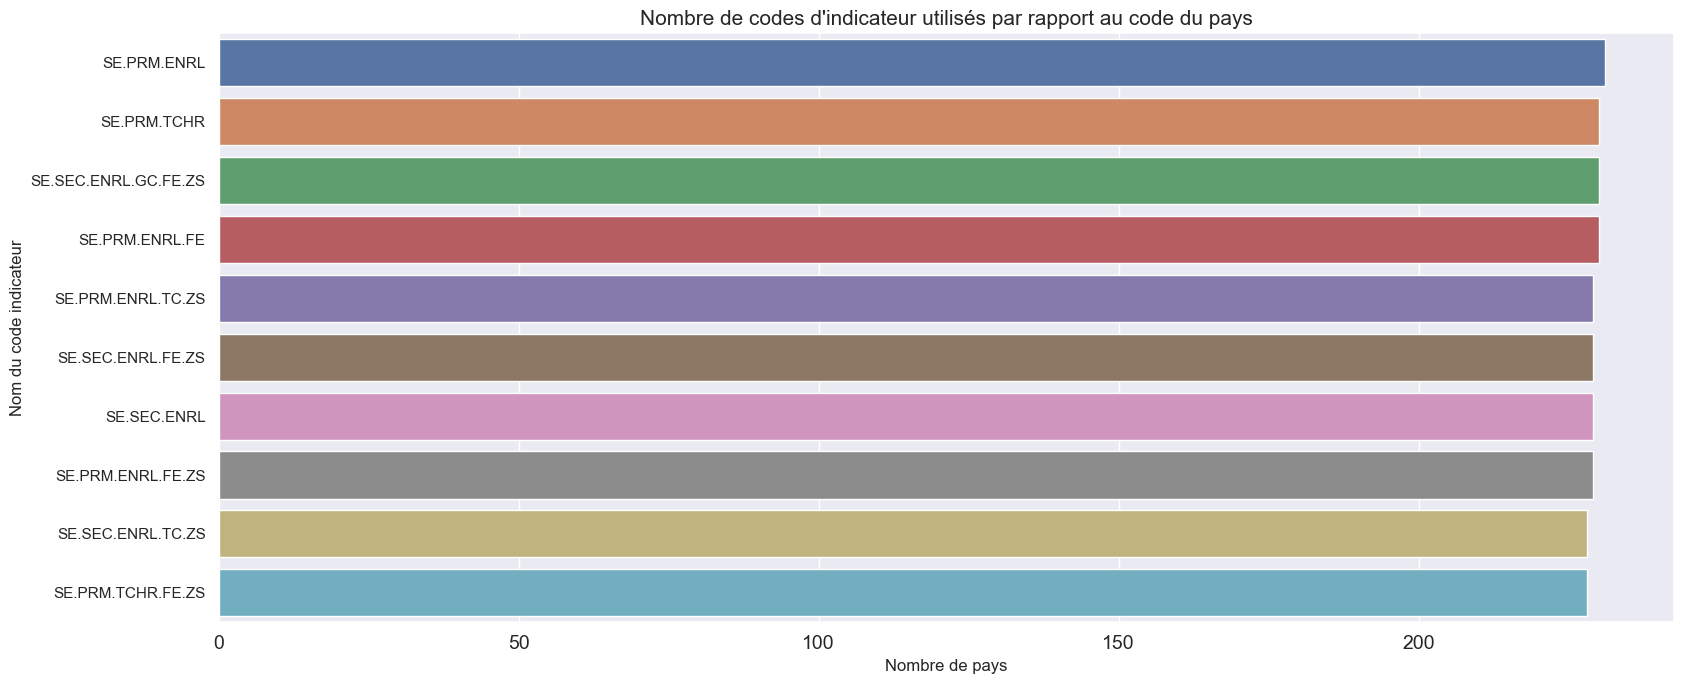

In [49]:
plt.figure(figsize=(17, 7))
sns.barplot(data=footnote_seriescode_top, x="CountryCode", y="SeriesCode", errorbar=None)
plt.title("Nombre de codes d'indicateur utilisés par rapport au code du pays", fontsize=15)
plt.xlabel('Nombre de pays')
plt.ylabel('Nom du code indicateur')
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

#### Définition des différents indicateurs

On va aller recherche à quoi correspond ces différents indicateurs :

**SE.PRM.TCHR** : Nombre de professeurs à temps plein ou temps partiel dans le secteur de l'éducation primaire.  
**SE.PRM.TCHR.FE.ZS** : Nombre de professeurs chez les femmes à temps plein ou temps partiel dans le secteur de l'éducation primaire, en pourcentage.  


**SE.PRM.ENRL** : Nombre d'élèves dans le secteur de l'éducation primaire, que ce soit en école privée ou publique.  
**SE.PRM.ENRL.FE** : Nombre d'élèves chez les filles dans le secteur de l'éducation primaire.  
**SE.PRM.ENRL.FE.ZS** : Nombre d'élèves chez les filles dans le secteur de l'éducation primaire, en pourcentage.  
**SE.PRM.ENRL.TC.ZS**	: Moyenne des élèves par professeur dans le secteur de l'éducation primaire.  


**<font color="green">SE.SEC.ENRL</font>** : Nombre d'élèves dans le secteur de l'éducation secondaire, que ce soit en école privée ou publique.   
**SE.SEC.ENRL.GC.FE.ZS** : Nombre de filles parmi les elèves dans le secteur de le secteur de l'éducation secondaire, incluant la formation de professeur.  
**SE.SEC.ENRL.FE.ZS** : Nombre d'élèves chez les filles dans le secteur de l'éducation secondaire, en pourcentage.   
**SE.SEC.ENRL.TC.ZS**	: Moyenne des élèves par professeur dans le secteur de l'éducation secondaire.  

Voici la description des 10 indicateurs retrouvés dans notre top 10.  

**SE.PRM.ENRL** étant notre indicateur le plus utilisé, ce n'est pas forcément celui qui nous intéressera le plus, étant donné que ce n'est pas notre cible. Nous recherchons plutôt des indicateurs concernant les étudiants en études secondaires ou supérieures.

#### Analyse des indicateurs pour le futur

In [50]:
footnote_countrycode_future = df_footnote.groupby(['SeriesCode', 'Year'])['CountryCode'].count().reset_index()
footnote_countrycode_future = footnote_countrycode_future.sort_values('Year', ascending=False)
footnote_countrycode_future.head(10)

,SeriesCode,Year,CountryCode
7591,SP.POP.0014.MA.IN,YR2050,11
7536,SP.POP.0014.FE.IN,YR2050,11
7701,SP.POP.0014.TO.ZS,YR2050,12
7646,SP.POP.0014.TO,YR2050,11
7811,SP.POP.1564.MA.IN,YR2050,11
8133,SP.POP.TOTL.FE.ZS,YR2050,16
8023,SP.POP.TOTL,YR2050,4
8078,SP.POP.TOTL.FE.IN,YR2050,15
7866,SP.POP.1564.TO,YR2050,11
8243,SP.POP.TOTL.MA.ZS,YR2050,16


Le tour a été fait par rapport à ce jeu de données. On a pu voir s'il y avait des données manquantes, dupliquées, les indicateurs importants à possiblement utiliser pour la suite, ceux qui ne le seront pas. On a pu voir aussi par rapport à différentes années également.

## EdStatsData

In [51]:
display(df_data.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822,54.894,56.209,57.267,57.991,59.366,61.000,61.923,62.693,64.383,65.618,66.085,66.608,67.290,68.510,69.033,69.945,71.042,71.694,71.699,71.996,72.603,70.033,70.465,72.646,71.812,73.904,74.425,75.111,76.254,77.246,78.801,80.051,80.805,81.607,82.489,82.686,83.280,84.012,84.196,85.212,85.245,86.102,85.512,85.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_data.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

In [53]:
df_data.duplicated().sum()

0

In [54]:
df_data.shape

(886930, 70)

In [55]:
df_data['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


On peut apercevoir dans ce jeu de données (df_edstats_data), qu'on ne retrouve pas seulement des noms de pays. Un nettoyage s'imposera pour arranger ces données.

In [56]:
# Parcourt toutes les colonnes pour afficher les valeurs uniques et voir plus en détails les potentiels soucis
for col in df_data.columns:
    print(f"Valeurs uniques dans '{col}' : \n{df_data[col].unique()}")
    print("-------------")

Valeurs uniques dans 'Country Name' : 
['Arab World' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'European Union' 'Heavily indebted poor countries (HIPC)' 'High income'
 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)' 'Middle income'
 'North America' 'OECD members' 'South Asia' 'Sub-Saharan Africa'
 'Sub-Saharan Africa (excluding high income)' 'Upper middle income'
 'World' 'Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and He

In [57]:
df_data_years = df_data.loc[:, '1970':'2100'].notnull().sum()
df_data_years

1970    72288
1971    35537
1972    35619
1973    35545
1974    35730
        ...  
2080    51436
2085    51436
2090    51436
2095    51436
2100    51436
Length: 65, dtype: int64

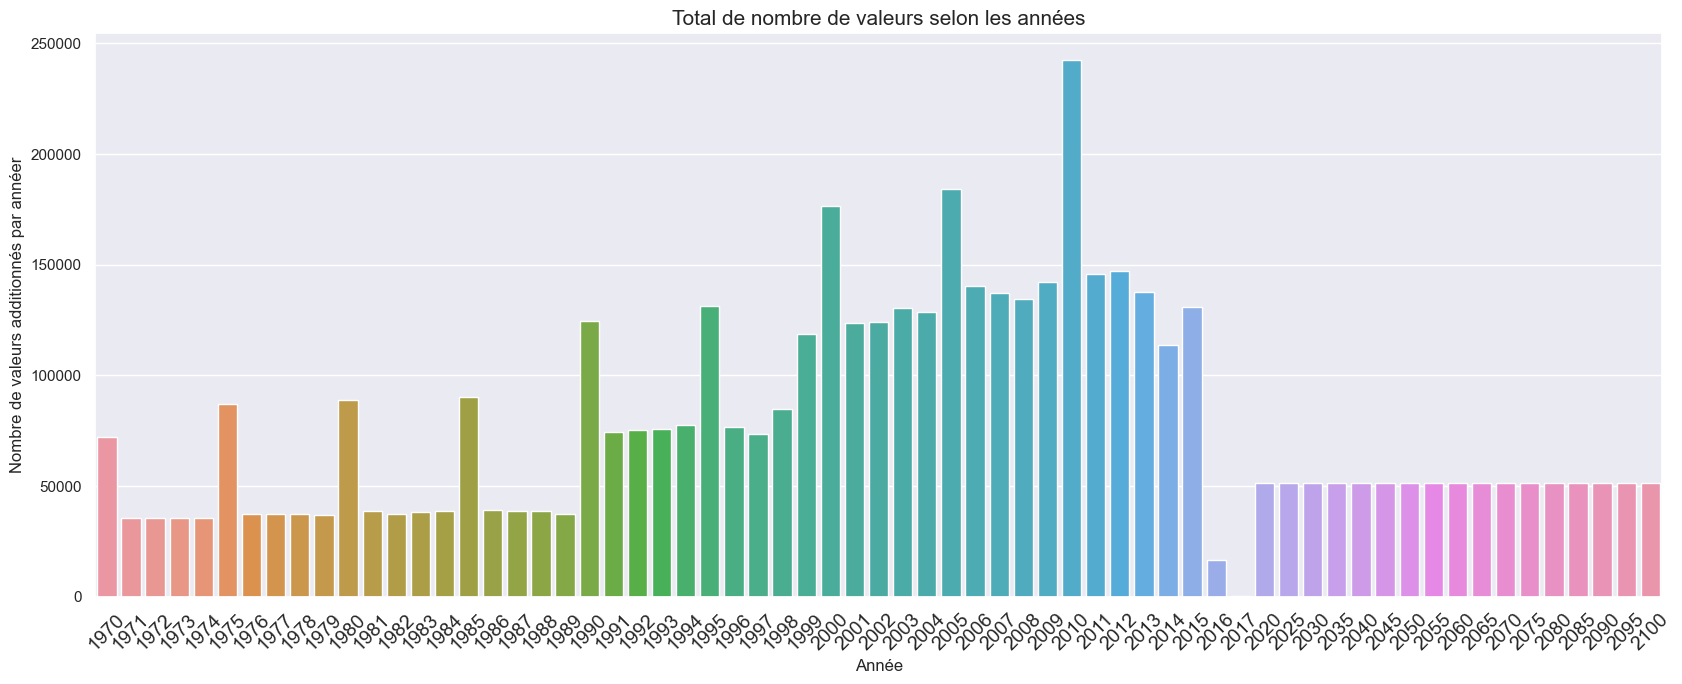

In [58]:
plt.figure(figsize=(17, 7))
sns.barplot(x=df_data_years.index, y=df_data_years.values, errorbar=None)
plt.xticks(rotation=45)
plt.title("Total de nombre de valeurs selon les années", fontsize=15)
plt.xlabel('Année')
plt.ylabel('Nombre de valeurs additionnés par annéer')
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

On peut constater un pic de valeurs tous les 5 ans, de 1970 à 2010. Avec aussi une observation qu'à partir de 1990, on obtient un peu plus valeurs qu'avant. Et pour terminer, exactement le même nombre de valeurs entre 2020 et 2100, à creuser.

# Conclusion (temporaire) de l'analyse 

"Country" contient des données relatives à chaque pays (nom, région, niveau de revenu...).  
"CountrySeries" contient la liste des indicateurs et la source par pays.  
"Series" contient la liste des indicateurs avec leur thème et définition.  
"FootNote" contient la liste des indicateurs et l'année de leur publication.    
"Data" contient les données par pays.  

----------

**Rappel** :

On recherche différentes informations que l'on aimerait récupérer pour pouvoir proposer des formations en ligne pour un public de niveau lycée ou université. Voici les indicateurs que l'on aimerait garder pour analyser au mieux notre stratégie :

- Le PIB du pays
- Le taux de scolarisation pour les établissements secondaires et supérieurs
- La démographie du pays
- La stabilité politique du pays
- L'accès à internet et/ou au matériel informatique

# Choix des indicateurs

## Le PIB des pays

On se souvient que dans le jeu de données "Country", on avait des informations concernant le revenu. On va aller récupérer tout ceci.

In [59]:
display(df_country.head())

,Country Code,Region,Income Group
0,ABW,Latin America & Caribbean,High income: nonOECD
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Upper middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income: nonOECD


In [60]:
df_country['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [61]:
country_income_grouped = df_country.groupby('Income Group')['Country Code'].count().reset_index()
country_income_grouped = country_income_grouped.sort_values('Country Code', ascending=False)
country_income_grouped

,Income Group,Country Code
4,Upper middle income,55
3,Lower middle income,50
1,High income: nonOECD,44
2,Low income,34
0,High income: OECD,31


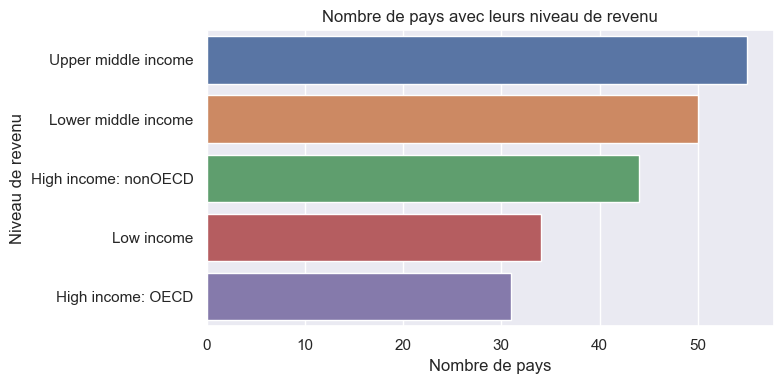

In [62]:
plt.figure(figsize=(8,4))
sns.barplot(data=country_income_grouped, x="Country Code", y="Income Group")
plt.xlabel('Nombre de pays')
plt.ylabel('Niveau de revenu')
plt.title('Nombre de pays avec leurs niveau de revenu')
plt.tight_layout()
plt.show()

On se souvient également que dans le jeu de données "Country Series", on avait retrouvé cette information :  

**NY.GNP.PCAP.PP.CD** : RNB par habitant, en parité de pouvoir d'achat (PP), en dollars internationaux courants.

Elle est donc probablement présente dans le jeu de données "Series", confirmons ça.

In [63]:
# Recherche du code indicateur "NY.GNP.PCAP.PP.CD"
df_series.loc[df_series['Series Code'] == "NY.GNP.PCAP.PP.CD", :]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1669,NY.GNP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GNI per capita, PPP (current international $)",NaN,GNI per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Taux de scolarisation

Dans le jeu de données "series", on avait aperçu des indicateurs concernant les études secondaires & supérieurs. On va aller vérifier ça.

In [64]:
# Recherche des codes indicateurs "SE.SEC.ENRR"
secondary_filter = df_series.loc[(df_series['Series Code'] == 'SE.SEC.ENRR'), :]
secondary_filter = secondary_filter[['Series Code', 'Topic', 'Indicator Name', 'Long definition']]
secondary_filter 

,Series Code,Topic,Indicator Name,Long definition
2307,SE.SEC.ENRR,Secondary,"Gross enrolment ratio, secondary, both sexes (%)","Total enrollment in secondary education, regar..."


In [65]:
tertiary_filter = df_series.loc[(df_series['Series Code'] == 'SE.TER.ENRR'), :]
tertiary_filter = tertiary_filter[['Series Code', 'Topic', 'Indicator Name', 'Long definition']]
tertiary_filter 

,Series Code,Topic,Indicator Name,Long definition
2335,SE.TER.ENRR,Tertiary,"Gross enrolment ratio, tertiary, both sexes (%)",Total enrollment in tertiary education (ISCED ...


## Population

On avait pu remarquer l'indicateur "SP.POP.TOTL" également précédemment, on va aller vérifier ça.

In [66]:
# Recherche du code indicateur "SP.POP.TOTL"
population_filter = df_series.loc[df_series['Series Code'] == 'SP.POP.TOTL', :]
population_filter = population_filter[['Series Code', 'Topic', 'Indicator Name', 'Long definition']]
population_filter

,Series Code,Topic,Indicator Name,Long definition
2590,SP.POP.TOTL,Health: Population: Structure,"Population, total",Total population is based on the de facto defi...


## Stabilité politique

Après recherche sur le site de la world bank, on a vu comment s'appelle l'indicateur concernant la stabilité politique, il s'agit de [PV.EST](https://databank.worldbank.org/source/worldwide-governance-indicators/Series/PV.EST), regardons ça en détails.

In [67]:
# Recherche du code indicateur "PV.EST"
df_series.loc[df_series['Series Code'] == 'PV.EST', :]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20


L'indicateur n'est pas présent, je vais donc télécharger le jeu de données en question présent dans le lien ci-dessus et l'ajouter. Pour permettre une meilleure cohérence avec nos autres données et éviter du nettoyage, je vais prendre que jusqu'à 2016 pour les années de stabilité politique.

In [68]:
df_political_stability = pd.read_csv('Data/EdStatsStability.csv')
display(df_political_stability)
df_political_stability.shape

,Series Name,Series Code,Country Name,Country Code,1996 [YR1996],1998 [YR1998],2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,Political Stability and Absence of Violence/Te...,PV.EST,Afghanistan,AFG,-2.41730952262878,-2.42735457420349,-2.43896889686584,-2.03503370285034,-2.19837236404419,-2.29568219184875,-2.06750988960266,-2.21913456916809,-2.4133734703064,-2.69136095046997,-2.71142148971558,-2.57915186882019,-2.50205969810486,-2.41856145858765,-2.51934909820557,-2.41106843948364,-2.56262516975403,-2.6621561050415
1,Political Stability and Absence of Violence/Te...,PV.EST,Albania,ALB,-0.336625128984451,-0.544004201889038,-0.539989590644836,-0.297719180583954,-0.309780240058899,-0.427259683609009,-0.505047976970673,-0.508157312870026,-0.203974649310112,-0.0305009130388498,-0.0451405122876167,-0.191482901573181,-0.282379418611526,-0.143631592392921,0.0919297859072685,0.485986232757568,0.341639041900635,0.337447881698608
2,Political Stability and Absence of Violence/Te...,PV.EST,Algeria,DZA,-1.78331053256989,-1.87890470027924,-1.43257737159729,-1.63456511497498,-1.75440907478333,-1.35918843746185,-0.913666009902954,-1.1264134645462,-1.15058553218842,-1.09584629535675,-1.19691348075867,-1.25936758518219,-1.36056065559387,-1.32504332065582,-1.20237147808075,-1.19053518772125,-1.09078657627106,-1.09974193572998
3,Political Stability and Absence of Violence/Te...,PV.EST,American Samoa,ASM,..,..,..,..,..,0.7369264960289,0.746284067630768,0.703987658023834,0.967931151390076,0.984463036060333,0.945724666118622,0.919146716594696,0.933990180492401,0.952990829944611,0.928985774517059,1.08068346977234,1.15167808532715,1.15855598449707
4,Political Stability and Absence of Violence/Te...,PV.EST,Andorra,AND,1.16952216625214,1.18287515640259,1.16698145866394,1.28276693820953,1.46513116359711,1.40210604667664,1.38492727279663,1.34965407848358,1.34201574325562,1.33847212791443,1.29713952541351,1.27827215194702,1.30248832702637,1.29035115242004,1.28392601013184,1.28659331798553,1.36598539352417,1.38275027275085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,Data from database: Worldwide Governance Indic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(219, 22)

In [69]:
df_political_stability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    216 non-null    object
 1   Series Code    214 non-null    object
 2   Country Name   214 non-null    object
 3   Country Code   214 non-null    object
 4   1996 [YR1996]  214 non-null    object
 5   1998 [YR1998]  214 non-null    object
 6   2000 [YR2000]  214 non-null    object
 7   2002 [YR2002]  214 non-null    object
 8   2003 [YR2003]  214 non-null    object
 9   2004 [YR2004]  214 non-null    object
 10  2005 [YR2005]  214 non-null    object
 11  2006 [YR2006]  214 non-null    object
 12  2007 [YR2007]  214 non-null    object
 13  2008 [YR2008]  214 non-null    object
 14  2009 [YR2009]  214 non-null    object
 15  2010 [YR2010]  214 non-null    object
 16  2011 [YR2011]  214 non-null    object
 17  2012 [YR2012]  214 non-null    object
 18  2013 [YR2013]  214 non-null   

### Nettoyage du jeu de données 

Quelques lignes vides sont à signaler vers la fin du jeu de données. On va commencer par vérifier jusqu'à où et les supprimer.

In [70]:
df_political_stability.tail(8)

,Series Name,Series Code,Country Name,Country Code,1996 [YR1996],1998 [YR1998],2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
211,Political Stability and Absence of Violence/Te...,PV.EST,"Yemen, Rep.",YEM,-1.31153786182404,-1.19284749031067,-1.14544129371643,-1.30688047409058,-1.48176205158234,-1.55118668079376,-1.43667340278625,-1.34531164169312,-1.59425187110901,-2.01279425621033,-2.32902073860168,-2.4237163066864,-2.42679643630981,-2.43066310882568,-2.37482810020447,-2.66557502746582,-2.66801619529724,-2.78448867797852
212,Political Stability and Absence of Violence/Te...,PV.EST,Zambia,ZMB,-0.159948900341988,0.21886819601059,0.0357203297317028,-0.274405479431152,0.218379899859428,0.190814405679703,0.108463242650032,0.363792210817337,0.363629281520844,0.472572863101959,0.569586157798767,0.515351355075836,0.509773790836334,0.660962522029877,0.435933291912079,0.156212016940117,0.144709780812263,0.132928282022476
213,Political Stability and Absence of Violence/Te...,PV.EST,Zimbabwe,ZWE,-0.466122418642044,-0.740443408489227,-1.31881785392761,-1.51587021350861,-1.08758056163788,-1.20470404624939,-1.26764357089996,-0.931996047496796,-1.1103447675705,-1.21233808994293,-1.16718089580536,-1.10401391983032,-0.945328533649445,-0.778662025928497,-0.665949761867523,-0.713570177555084,-0.619207262992859,-0.620809733867645
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,Data from database: Worldwide Governance Indic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,Last Updated: 09/29/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Les 5 dernières lignes sont à supprimer, puis on vérifie (la dernière ligne devrait concerner le Zimbabwe)
df_political_stability.drop(df_political_stability.tail(5).index, inplace=True)
df_political_stability.tail()

,Series Name,Series Code,Country Name,Country Code,1996 [YR1996],1998 [YR1998],2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
209,Political Stability and Absence of Violence/Te...,PV.EST,Virgin Islands (U.S.),VIR,..,..,..,..,..,0.839443206787109,0.442666381597519,0.508818447589874,0.483246594667435,0.500850796699524,-0.143221497535706,0.339058101177216,0.860623061656952,0.67957615852356,0.846709191799164,1.16425490379333,1.22000181674957,0.975613653659821
210,Political Stability and Absence of Violence/Te...,PV.EST,West Bank and Gaza,PSE,-1.40572607517242,-1.3539137840271,-1.57441258430481,-1.74340748786926,-1.26578211784363,-1.16626405715942,-1.54093611240387,-1.7702112197876,-1.87161386013031,-1.99042999744415,-2.04333114624023,-1.97357547283173,-1.93561995029449,-1.95603215694427,-1.77882349491119,-1.98501086235046,-2.1540961265564,-1.97087836265564
211,Political Stability and Absence of Violence/Te...,PV.EST,"Yemen, Rep.",YEM,-1.31153786182404,-1.19284749031067,-1.14544129371643,-1.30688047409058,-1.48176205158234,-1.55118668079376,-1.43667340278625,-1.34531164169312,-1.59425187110901,-2.01279425621033,-2.32902073860168,-2.4237163066864,-2.42679643630981,-2.43066310882568,-2.37482810020447,-2.66557502746582,-2.66801619529724,-2.78448867797852
212,Political Stability and Absence of Violence/Te...,PV.EST,Zambia,ZMB,-0.159948900341988,0.21886819601059,0.0357203297317028,-0.274405479431152,0.218379899859428,0.190814405679703,0.108463242650032,0.363792210817337,0.363629281520844,0.472572863101959,0.569586157798767,0.515351355075836,0.509773790836334,0.660962522029877,0.435933291912079,0.156212016940117,0.144709780812263,0.132928282022476
213,Political Stability and Absence of Violence/Te...,PV.EST,Zimbabwe,ZWE,-0.466122418642044,-0.740443408489227,-1.31881785392761,-1.51587021350861,-1.08758056163788,-1.20470404624939,-1.26764357089996,-0.931996047496796,-1.1103447675705,-1.21233808994293,-1.16718089580536,-1.10401391983032,-0.945328533649445,-0.778662025928497,-0.665949761867523,-0.713570177555084,-0.619207262992859,-0.620809733867645


Pour avoir des jeux de données homogènes avec nos données présentes dans le jeu "EdStatsData", il va falloir renommer les colonnes d'années.

In [72]:
# Je sélectionne les colonnes à partir de la 5ème jusqu'à la fin
columns_to_rename = df_political_stability.columns[4:]

# Je renomme ces colonnes en utilisant une fonction lambda
df_political_stability.rename(columns={col: col[:4] 
                                               for col in columns_to_rename}, inplace=True)

display(df_political_stability.head())

,Series Name,Series Code,Country Name,Country Code,1996,1998,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Political Stability and Absence of Violence/Te...,PV.EST,Afghanistan,AFG,-2.41730952262878,-2.42735457420349,-2.43896889686584,-2.03503370285034,-2.19837236404419,-2.29568219184875,-2.06750988960266,-2.21913456916809,-2.4133734703064,-2.69136095046997,-2.71142148971558,-2.57915186882019,-2.50205969810486,-2.41856145858765,-2.51934909820557,-2.41106843948364,-2.56262516975403,-2.6621561050415
1,Political Stability and Absence of Violence/Te...,PV.EST,Albania,ALB,-0.336625128984451,-0.544004201889038,-0.539989590644836,-0.297719180583954,-0.309780240058899,-0.427259683609009,-0.505047976970673,-0.508157312870026,-0.203974649310112,-0.0305009130388498,-0.0451405122876167,-0.191482901573181,-0.282379418611526,-0.143631592392921,0.0919297859072685,0.485986232757568,0.341639041900635,0.337447881698608
2,Political Stability and Absence of Violence/Te...,PV.EST,Algeria,DZA,-1.78331053256989,-1.87890470027924,-1.43257737159729,-1.63456511497498,-1.75440907478333,-1.35918843746185,-0.913666009902954,-1.1264134645462,-1.15058553218842,-1.09584629535675,-1.19691348075867,-1.25936758518219,-1.36056065559387,-1.32504332065582,-1.20237147808075,-1.19053518772125,-1.09078657627106,-1.09974193572998
3,Political Stability and Absence of Violence/Te...,PV.EST,American Samoa,ASM,..,..,..,..,..,0.7369264960289,0.746284067630768,0.703987658023834,0.967931151390076,0.984463036060333,0.945724666118622,0.919146716594696,0.933990180492401,0.952990829944611,0.928985774517059,1.08068346977234,1.15167808532715,1.15855598449707
4,Political Stability and Absence of Violence/Te...,PV.EST,Andorra,AND,1.16952216625214,1.18287515640259,1.16698145866394,1.28276693820953,1.46513116359711,1.40210604667664,1.38492727279663,1.34965407848358,1.34201574325562,1.33847212791443,1.29713952541351,1.27827215194702,1.30248832702637,1.29035115242004,1.28392601013184,1.28659331798553,1.36598539352417,1.38275027275085


In [73]:
df_political_stability = df_political_stability.rename(columns={"Series Name": "Indicator Name", "Series Code": "Indicator Code"})
df_political_stability.head()

,Indicator Name,Indicator Code,Country Name,Country Code,1996,1998,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Political Stability and Absence of Violence/Te...,PV.EST,Afghanistan,AFG,-2.41730952262878,-2.42735457420349,-2.43896889686584,-2.03503370285034,-2.19837236404419,-2.29568219184875,-2.06750988960266,-2.21913456916809,-2.4133734703064,-2.69136095046997,-2.71142148971558,-2.57915186882019,-2.50205969810486,-2.41856145858765,-2.51934909820557,-2.41106843948364,-2.56262516975403,-2.6621561050415
1,Political Stability and Absence of Violence/Te...,PV.EST,Albania,ALB,-0.336625128984451,-0.544004201889038,-0.539989590644836,-0.297719180583954,-0.309780240058899,-0.427259683609009,-0.505047976970673,-0.508157312870026,-0.203974649310112,-0.0305009130388498,-0.0451405122876167,-0.191482901573181,-0.282379418611526,-0.143631592392921,0.0919297859072685,0.485986232757568,0.341639041900635,0.337447881698608
2,Political Stability and Absence of Violence/Te...,PV.EST,Algeria,DZA,-1.78331053256989,-1.87890470027924,-1.43257737159729,-1.63456511497498,-1.75440907478333,-1.35918843746185,-0.913666009902954,-1.1264134645462,-1.15058553218842,-1.09584629535675,-1.19691348075867,-1.25936758518219,-1.36056065559387,-1.32504332065582,-1.20237147808075,-1.19053518772125,-1.09078657627106,-1.09974193572998
3,Political Stability and Absence of Violence/Te...,PV.EST,American Samoa,ASM,..,..,..,..,..,0.7369264960289,0.746284067630768,0.703987658023834,0.967931151390076,0.984463036060333,0.945724666118622,0.919146716594696,0.933990180492401,0.952990829944611,0.928985774517059,1.08068346977234,1.15167808532715,1.15855598449707
4,Political Stability and Absence of Violence/Te...,PV.EST,Andorra,AND,1.16952216625214,1.18287515640259,1.16698145866394,1.28276693820953,1.46513116359711,1.40210604667664,1.38492727279663,1.34965407848358,1.34201574325562,1.33847212791443,1.29713952541351,1.27827215194702,1.30248832702637,1.29035115242004,1.28392601013184,1.28659331798553,1.36598539352417,1.38275027275085


## Accès à internet

D'après le site de la world bank, on peut trouver un % de la population ayant acccès à internet grâce à [cet indicateur](https://databank.worldbank.org/metadataglossary/world-development-indicators/series/IT.NET.USER.ZS)

In [74]:
# Recherche du code indicateur "IT.NET.USER.ZS"
df_series.loc[df_series['Series Code'] == 'IT.NET.USER.ZS', :]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20


Tout comme l'indicateur de la stabilité politique, il n'est pas présent dans le jeu de données initial, on va donc l'ajouter et effectuer un léger nettoyage probablement similaire à celui fait à la stabilité politique.

In [75]:
df_internet = pd.read_csv('Data/EdStatsInternet.csv')
display(df_internet)

,Series Name,Series Code,Country Name,Country Code,1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,Individuals using the Internet (% of population),IT.NET.USER.ZS,Afghanistan,AFG,..,..,..,..,..,0.004722568,0.004561395,0.087891253,0.10580903,1.224148084,2.107123645,1.9,1.84,3.55,4,5,5.454545455,5.9,7,8.26,11
1,Individuals using the Internet (% of population),IT.NET.USER.ZS,Albania,ALB,0.032196828,0.048593919,0.06502737,0.081437045,0.114097347,0.325798377,0.390081273,0.971900415,2.420387798,6.043890864,9.609991316,15.03611541,23.86,41.2,45,47,49.4,51.8,54.3,56.9,59.6
2,Individuals using the Internet (% of population),IT.NET.USER.ZS,Algeria,DZA,0.001738533,0.010268463,0.020238555,0.199523843,0.491705679,0.646114017,1.59164126,2.195359731,4.634475088,5.843942092,7.375984956,9.451190626,10.18,11.23,12.5,14.9,18.2,22.5,29.5,38.2,42.94552688
3,Individuals using the Internet (% of population),IT.NET.USER.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4,Individuals using the Internet (% of population),IT.NET.USER.ZS,Andorra,AND,1.526601023,3.050175385,6.886209218,7.635686143,10.53883561,..,11.26046872,13.54641288,26.83795439,37.60576622,48.936847,70.87,70.04,78.53,81,81,82.7,84.4,86.1,87.9,89.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    268 non-null    object
 1   Series Code    266 non-null    object
 2   Country Name   266 non-null    object
 3   Country Code   266 non-null    object
 4   1996 [YR1996]  266 non-null    object
 5   1997 [YR1997]  266 non-null    object
 6   1998 [YR1998]  266 non-null    object
 7   1999 [YR1999]  266 non-null    object
 8   2000 [YR2000]  266 non-null    object
 9   2001 [YR2001]  266 non-null    object
 10  2002 [YR2002]  266 non-null    object
 11  2003 [YR2003]  266 non-null    object
 12  2004 [YR2004]  266 non-null    object
 13  2005 [YR2005]  266 non-null    object
 14  2006 [YR2006]  266 non-null    object
 15  2007 [YR2007]  266 non-null    object
 16  2008 [YR2008]  266 non-null    object
 17  2009 [YR2009]  266 non-null    object
 18  2010 [YR2010]  266 non-null   

### Nettoyage du jeu de données

In [77]:
df_internet.tail(8)

,Series Name,Series Code,Country Name,Country Code,1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
263,Individuals using the Internet (% of population),IT.NET.USER.ZS,Sub-Saharan Africa (IDA & IBRD countries),TSS,0.0723178856418828,0.135088535529205,0.244727114553212,0.373976532861205,0.516909537706239,0.656544940051198,0.839168617392893,1.11483294800094,1.49527027233515,2.01588847155429,2.65915703173474,3.36999838568923,3.669101868449,4.31299810023941,6.13796784399575,7.59663525203002,9.28488742007677,11.1593890969573,13.3689854263355,16.0117099299336,18.6363083075504
264,Individuals using the Internet (% of population),IT.NET.USER.ZS,Upper middle income,UMC,0.121833086764281,0.258367106201605,0.572192215928892,1.19954303051395,2.39331538440819,3.51520738824091,5.68055058511595,7.41568211143194,9.27827430018105,10.8143706580341,13.251430133901,17.6818890357646,22.5437093982736,27.5534189302601,32.5114999014179,36.7519903556915,40.7059230585659,43.5634122580291,46.1066431020146,49.4666579151593,52.7127167121665
265,Individuals using the Internet (% of population),IT.NET.USER.ZS,World,WLD,1.32656715777098,2.04269705765004,3.14057959772322,4.63290278425647,6.74371951164793,8.05355597290396,10.5185284204174,12.195854587379,14.0818185720611,15.6746614701687,17.4264207150172,20.3545368455848,23.0068355018592,25.560005264161,28.7976530775359,31.2119650923936,33.7133614270398,35.6492575186719,37.8807809660353,40.2700586394911,43.2159802414783
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,Last Updated: 12/18/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df_internet.drop(df_internet.tail(5).index, inplace=True)
df_internet.tail()

,Series Name,Series Code,Country Name,Country Code,1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
261,Individuals using the Internet (% of population),IT.NET.USER.ZS,Sub-Saharan Africa,SSF,0.0723178856418829,0.135088535529205,0.244727114553212,0.373976532861205,0.516909537706238,0.656544940051198,0.839168617392893,1.11483294800094,1.49527027233515,2.01588847155429,2.65915703173474,3.36999838568923,3.669101868449,4.31299810023941,6.13796784399575,7.59663525203002,9.28488742007677,11.1593890969573,13.3689854263355,16.0117099299336,18.6363083075504
262,Individuals using the Internet (% of population),IT.NET.USER.ZS,Sub-Saharan Africa (excluding high income),SSA,0.072239921157922,0.134945763092731,0.24444651395623,0.373264209407416,0.51608145917158,0.655311985260344,0.837585115247032,1.11326183139986,1.49265011420369,2.0132204805788,2.65532577778128,3.3661405682563,3.66493829912678,4.31299810023942,6.13405945063333,7.59275285086043,9.2808102353621,11.1552596965179,13.3650541796102,16.0077986869433,18.6326338422342
263,Individuals using the Internet (% of population),IT.NET.USER.ZS,Sub-Saharan Africa (IDA & IBRD countries),TSS,0.0723178856418828,0.135088535529205,0.244727114553212,0.373976532861205,0.516909537706239,0.656544940051198,0.839168617392893,1.11483294800094,1.49527027233515,2.01588847155429,2.65915703173474,3.36999838568923,3.669101868449,4.31299810023941,6.13796784399575,7.59663525203002,9.28488742007677,11.1593890969573,13.3689854263355,16.0117099299336,18.6363083075504
264,Individuals using the Internet (% of population),IT.NET.USER.ZS,Upper middle income,UMC,0.121833086764281,0.258367106201605,0.572192215928892,1.19954303051395,2.39331538440819,3.51520738824091,5.68055058511595,7.41568211143194,9.27827430018105,10.8143706580341,13.251430133901,17.6818890357646,22.5437093982736,27.5534189302601,32.5114999014179,36.7519903556915,40.7059230585659,43.5634122580291,46.1066431020146,49.4666579151593,52.7127167121665
265,Individuals using the Internet (% of population),IT.NET.USER.ZS,World,WLD,1.32656715777098,2.04269705765004,3.14057959772322,4.63290278425647,6.74371951164793,8.05355597290396,10.5185284204174,12.195854587379,14.0818185720611,15.6746614701687,17.4264207150172,20.3545368455848,23.0068355018592,25.560005264161,28.7976530775359,31.2119650923936,33.7133614270398,35.6492575186719,37.8807809660353,40.2700586394911,43.2159802414783


In [79]:
# Je sélectionne les colonnes à partir de la 5ème jusqu'à la fin
columns_to_rename = df_internet.columns[4:]

# Je renomme ces colonnes en utilisant une fonction lambda
df_internet.rename(columns={col: col[:4] 
                                               for col in columns_to_rename}, inplace=True)

display(df_internet.head())

,Series Name,Series Code,Country Name,Country Code,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Individuals using the Internet (% of population),IT.NET.USER.ZS,Afghanistan,AFG,..,..,..,..,..,0.004722568,0.004561395,0.087891253,0.10580903,1.224148084,2.107123645,1.9,1.84,3.55,4,5,5.454545455,5.9,7,8.26,11
1,Individuals using the Internet (% of population),IT.NET.USER.ZS,Albania,ALB,0.032196828,0.048593919,0.06502737,0.081437045,0.114097347,0.325798377,0.390081273,0.971900415,2.420387798,6.043890864,9.609991316,15.03611541,23.86,41.2,45,47,49.4,51.8,54.3,56.9,59.6
2,Individuals using the Internet (% of population),IT.NET.USER.ZS,Algeria,DZA,0.001738533,0.010268463,0.020238555,0.199523843,0.491705679,0.646114017,1.59164126,2.195359731,4.634475088,5.843942092,7.375984956,9.451190626,10.18,11.23,12.5,14.9,18.2,22.5,29.5,38.2,42.94552688
3,Individuals using the Internet (% of population),IT.NET.USER.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4,Individuals using the Internet (% of population),IT.NET.USER.ZS,Andorra,AND,1.526601023,3.050175385,6.886209218,7.635686143,10.53883561,..,11.26046872,13.54641288,26.83795439,37.60576622,48.936847,70.87,70.04,78.53,81,81,82.7,84.4,86.1,87.9,89.7


In [80]:
df_internet = df_internet.rename(columns={"Series Name": "Indicator Name", "Series Code": "Indicator Code"})
df_internet.head()

,Indicator Name,Indicator Code,Country Name,Country Code,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Individuals using the Internet (% of population),IT.NET.USER.ZS,Afghanistan,AFG,..,..,..,..,..,0.004722568,0.004561395,0.087891253,0.10580903,1.224148084,2.107123645,1.9,1.84,3.55,4,5,5.454545455,5.9,7,8.26,11
1,Individuals using the Internet (% of population),IT.NET.USER.ZS,Albania,ALB,0.032196828,0.048593919,0.06502737,0.081437045,0.114097347,0.325798377,0.390081273,0.971900415,2.420387798,6.043890864,9.609991316,15.03611541,23.86,41.2,45,47,49.4,51.8,54.3,56.9,59.6
2,Individuals using the Internet (% of population),IT.NET.USER.ZS,Algeria,DZA,0.001738533,0.010268463,0.020238555,0.199523843,0.491705679,0.646114017,1.59164126,2.195359731,4.634475088,5.843942092,7.375984956,9.451190626,10.18,11.23,12.5,14.9,18.2,22.5,29.5,38.2,42.94552688
3,Individuals using the Internet (% of population),IT.NET.USER.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4,Individuals using the Internet (% of population),IT.NET.USER.ZS,Andorra,AND,1.526601023,3.050175385,6.886209218,7.635686143,10.53883561,..,11.26046872,13.54641288,26.83795439,37.60576622,48.936847,70.87,70.04,78.53,81,81,82.7,84.4,86.1,87.9,89.7


# Préparation du df final

## Préparation des pays

In [81]:
df_political_stability['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'French Guiana'

In [82]:
df_political_stability['Country Name'].nunique()

214

In [83]:
country_list = df_political_stability['Country Name'].unique()

In [84]:
df_data['Country Name'].nunique()

242

In [85]:
df_data['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [86]:
countries_not_in_df_political_stability = df_data.loc[~df_data['Country Name'].isin(country_list), :]

In [87]:
countries_not_in_df_political_stability['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'British Virgin Islands',
       'Channel Islands', 'Curacao', 'Czech Republic', 'Faroe Islands',
       'French Polynesia', 'Gibraltar', 'Isle of Man',
       'Korea, Dem. People’s Rep.', 'Macedonia, FYR', 'New Caledo

In [88]:
# On enregistre toute la liste dans le df en question dans une liste
country_political_stability_list = df_political_stability['Country Name'].unique()

In [89]:
country_political_stability_list

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'French Guiana'

## Préparation des indicateurs

In [90]:
indicator_list = ['SE.SEC.ENRR', 'SE.TER.ENRR','SP.POP.TOTL', 'PV.EST','IT.NET.USER.ZS', 'NY.GNP.PCAP.PP.CD']
indicator_list

['SE.SEC.ENRR',
 'SE.TER.ENRR',
 'SP.POP.TOTL',
 'PV.EST',
 'IT.NET.USER.ZS',
 'NY.GNP.PCAP.PP.CD']

In [91]:
df_data_new = df_data[df_data['Indicator Code'].isin(indicator_list)]
df_data_new.loc[df_data_new['Country Name'] == "Afghanistan", :]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92877,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,870.000,920.000,920.000,1010.000,1070.000,1210.000,1250.000,1490.000,1590.000,1680.000,1900.000,1900.000,1890.000,1880.000,1900.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,8.332,9.350,10.349,10.832,10.976,11.041,11.936,12.777,13.449,NaN,16.942,19.585,10.774,NaN,12.679,13.463,12.438,NaN,13.544,13.011,11.223,16.306,NaN,16.529,23.154,22.566,NaN,NaN,NaN,NaN,NaN,13.049,NaN,13.317,18.665,19.784,29.930,30.083,40.223,46.733,53.247,54.616,56.677,56.689,55.656,55.644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,0.768,0.924,0.952,1.097,1.026,1.080,1.223,1.358,1.747,1.882,NaN,NaN,1.744,NaN,NaN,NaN,2.204,1.743,NaN,NaN,2.273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.257,1.256,NaN,NaN,NaN,NaN,3.903,NaN,3.756,NaN,NaN,8.663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,11126123.000,11417825.000,11721940.000,12027822.000,12321541.000,12590286.000,12840299.000,13067538.000,13237734.000,13306695.000,13248370.000,13053954.000,12749645.000,12389269.000,12047115.000,11783050.000,11601041.000,11502761.000,11540888.000,11777609.000,12249114.000,12993657.000,13981231.000,15095099.000,16172719.000,17099541.000,17822884.000,18381605.000,18863999.000,19403676.000,20093756.000,20966463.000,21979923.000,23064851.000,24118979.000,25070798.000,25893450.000,26616792.000,27294031.000,28004331.000,28803167.000,29708599.000,30696958.000,31731688.000,32758020.000,33736494.000,34656032.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ajout des df internet et stabilité politique

In [92]:
df = pd.concat([df_data_new, df_political_stability])

In [93]:
df = pd.concat([df, df_internet])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1448 entries, 1252 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1448 non-null   object 
 1   Country Code    1448 non-null   object 
 2   Indicator Name  1448 non-null   object 
 3   Indicator Code  1448 non-null   object 
 4   1970            362 non-null    float64
 5   1971            538 non-null    float64
 6   1972            524 non-null    float64
 7   1973            519 non-null    float64
 8   1974            509 non-null    float64
 9   1975            509 non-null    float64
 10  1976            520 non-null    float64
 11  1977            516 non-null    float64
 12  1978            515 non-null    float64
 13  1979            522 non-null    float64
 14  1980            529 non-null    float64
 15  1981            551 non-null    float64
 16  1982            527 non-null    float64
 17  1983            525 non-null    floa

In [94]:
df['Indicator Code'].unique()

array(['NY.GNP.PCAP.PP.CD', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SP.POP.TOTL',
       'PV.EST', 'IT.NET.USER.ZS'], dtype=object)

In [95]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1252,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6580.709,6929.796,7219.502,7357.161,7488.242,7654.712,7943.293,8259.788,8551.746,8612.367,8966.476,9224.633,9256.850,9831.654,10590.896,11369.477,12356.842,13132.709,13824.486,13852.503,14284.023,14996.156,15846.498,16141.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,25.655,25.583,26.430,27.379,28.334,29.868,31.578,33.594,35.561,37.155,38.449,39.422,41.122,42.438,43.941,45.649,47.745,49.047,49.596,50.343,53.100,53.102,51.854,52.435,54.424,54.359,54.264,55.575,56.986,58.475,59.745,61.172,62.235,64.038,65.854,65.931,65.848,64.698,65.342,66.829,68.051,70.691,71.717,70.275,70.735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,5.897,5.891,6.169,6.531,6.933,7.478,8.135,8.776,9.215,9.261,9.604,10.183,10.555,10.732,11.017,11.020,11.340,11.394,11.454,11.119,11.170,10.892,11.495,12.380,12.983,13.819,14.799,15.725,16.528,17.912,18.161,18.765,19.569,19.559,20.699,21.731,22.191,22.737,23.438,24.099,24.762,24.274,25.776,27.330,28.175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2533,Arab World,ARB,"Population, total",SP.POP.TOTL,123400916.000,126726106.000,130095625.000,133592409.000,137327448.000,141376124.000,145768518.000,150474227.000,155422735.000,160508834.000,165653287.000,170835489.000,176068130.000,181346070.000,186631963.000,192047001.000,197522280.000,202985205.000,208460437.000,213911862.000,221488293.000,227470711.000,231443007.000,237418436.000,243271554.000,250504422.000,255932514.000,261260242.000,266537558.000,271912978.000,277561423.000,283493089.000,289680968.000,296095945.000,302824676.000,309824383.000,317125787.000,324693498.000,332424892.000,340149038.000,347737036.000,355137048.000,362466629.000,369761523.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,East Asia & Pacific,EAS,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3159.947,3397.746,3619.410,3871.698,4156.496,4451.983,4768.450,5021.101,5011.451,5243.601,5658.665,5972.604,6346.898,6769.111,7359.433,7979.804,8800.951,9767.941,10405.054,10758.262,11738.672,12601.058,13499.991,14389.108,15330.472,16149.931,17023.397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ajout d'informations financières sur les pays

In [96]:
df = df.merge(df_country, on="Country Code")
df.loc[df['Country Name'] == 'Afghanistan', :]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Region,Income Group
125,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,870.000,920.000,920.000,1010.000,1070.000,1210.000,1250.000,1490.000,1590.000,1680.000,1900.000,1900.000,1890.000,1880.000,1900.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
126,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,8.332,9.350,10.349,10.832,10.976,11.041,11.936,12.777,13.449,NaN,16.942,19.585,10.774,NaN,12.679,13.463,12.438,NaN,13.544,13.011,11.223,16.306,NaN,16.529,23.154,22.566,NaN,NaN,NaN,NaN,NaN,13.049,NaN,13.317,18.665,19.784,29.930,30.083,40.223,46.733,53.247,54.616,56.677,56.689,55.656,55.644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
127,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,0.768,0.924,0.952,1.097,1.026,1.080,1.223,1.358,1.747,1.882,NaN,NaN,1.744,NaN,NaN,NaN,2.204,1.743,NaN,NaN,2.273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.257,1.256,NaN,NaN,NaN,NaN,3.903,NaN,3.756,NaN,NaN,8.663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
128,Afghanistan,AFG,"Population, total",SP.POP.TOTL,11126123.000,11417825.000,11721940.000,12027822.000,12321541.000,12590286.000,12840299.000,13067538.000,13237734.000,13306695.000,13248370.000,13053954.000,12749645.000,12389269.000,12047115.000,11783050.000,11601041.000,11502761.000,11540888.000,11777609.000,12249114.000,12993657.000,13981231.000,15095099.000,16172719.000,17099541.000,17822884.000,18381605.000,18863999.000,19403676.000,20093756.000,20966463.000,21979923.000,23064851.000,24118979.000,25070798.000,25893450.000,26616792.000,27294031.000,28004331.000,28803167.000,29708599.000,30696958.000,31731688.000,32758020.000,33736494.000,34656032.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
129,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.41730952262878,NaN,-2.42735457420349,NaN,-2.43896889686584,NaN,-2.03503370285034,-2.19837236404419,-2.29568219184875,-2.06750988960266,-2.21913456916809,-2.4133734703064,-2.69136095046997,-2.71142148971558,-2.57915186882019,-2.50205969810486,-2.41856145858765,-2.51934909820557,-2.41106843948364,-2.56262516975403,-2.6621561050415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
130,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,..,..,..,..,0.004722568,0.004561395,0.087891253,0.10580903,1.224148084,2.107123645,1.9,1.84,3.55,4,5,5.454545455,5.9,7,8.26,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income


In [97]:
income_group = df.pop('Income Group')
region = df.pop('Region')

In [98]:
df.insert(2, 'Income Group', income_group)
df.insert(3, 'Region', region)

In [99]:
df.loc[df['Country Name'] == 'Afghanistan', :]

,Country Name,Country Code,Income Group,Region,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
125,Afghanistan,AFG,Low income,South Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,870.000,920.000,920.000,1010.000,1070.000,1210.000,1250.000,1490.000,1590.000,1680.000,1900.000,1900.000,1890.000,1880.000,1900.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,Afghanistan,AFG,Low income,South Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,8.332,9.350,10.349,10.832,10.976,11.041,11.936,12.777,13.449,NaN,16.942,19.585,10.774,NaN,12.679,13.463,12.438,NaN,13.544,13.011,11.223,16.306,NaN,16.529,23.154,22.566,NaN,NaN,NaN,NaN,NaN,13.049,NaN,13.317,18.665,19.784,29.930,30.083,40.223,46.733,53.247,54.616,56.677,56.689,55.656,55.644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Afghanistan,AFG,Low income,South Asia,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,0.768,0.924,0.952,1.097,1.026,1.080,1.223,1.358,1.747,1.882,NaN,NaN,1.744,NaN,NaN,NaN,2.204,1.743,NaN,NaN,2.273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.257,1.256,NaN,NaN,NaN,NaN,3.903,NaN,3.756,NaN,NaN,8.663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,Afghanistan,AFG,Low income,South Asia,"Population, total",SP.POP.TOTL,11126123.000,11417825.000,11721940.000,12027822.000,12321541.000,12590286.000,12840299.000,13067538.000,13237734.000,13306695.000,13248370.000,13053954.000,12749645.000,12389269.000,12047115.000,11783050.000,11601041.000,11502761.000,11540888.000,11777609.000,12249114.000,12993657.000,13981231.000,15095099.000,16172719.000,17099541.000,17822884.000,18381605.000,18863999.000,19403676.000,20093756.000,20966463.000,21979923.000,23064851.000,24118979.000,25070798.000,25893450.000,26616792.000,27294031.000,28004331.000,28803167.000,29708599.000,30696958.000,31731688.000,32758020.000,33736494.000,34656032.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,Afghanistan,AFG,Low income,South Asia,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.41730952262878,NaN,-2.42735457420349,NaN,-2.43896889686584,NaN,-2.03503370285034,-2.19837236404419,-2.29568219184875,-2.06750988960266,-2.21913456916809,-2.4133734703064,-2.69136095046997,-2.71142148971558,-2.57915186882019,-2.50205969810486,-2.41856145858765,-2.51934909820557,-2.41106843948364,-2.56262516975403,-2.6621561050415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,Afghanistan,AFG,Low income,South Asia,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,..,..,..,..,0.004722568,0.004561395,0.087891253,0.10580903,1.224148084,2.107123645,1.9,1.84,3.55,4,5,5.454545455,5.9,7,8.26,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df['Indicator Code'].unique()

array(['NY.GNP.PCAP.PP.CD', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SP.POP.TOTL',
       'IT.NET.USER.ZS', 'PV.EST'], dtype=object)

In [101]:
df['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [102]:
# Enlever du df final les valeurs contenus dans "countries_not_in_df_political_stability"
df = df[~df['Country Name'].isin(countries_not_in_df_political_stability['Country Name'])]
df['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany',
       'Ghana', 

## Vérification des valeurs manquantes

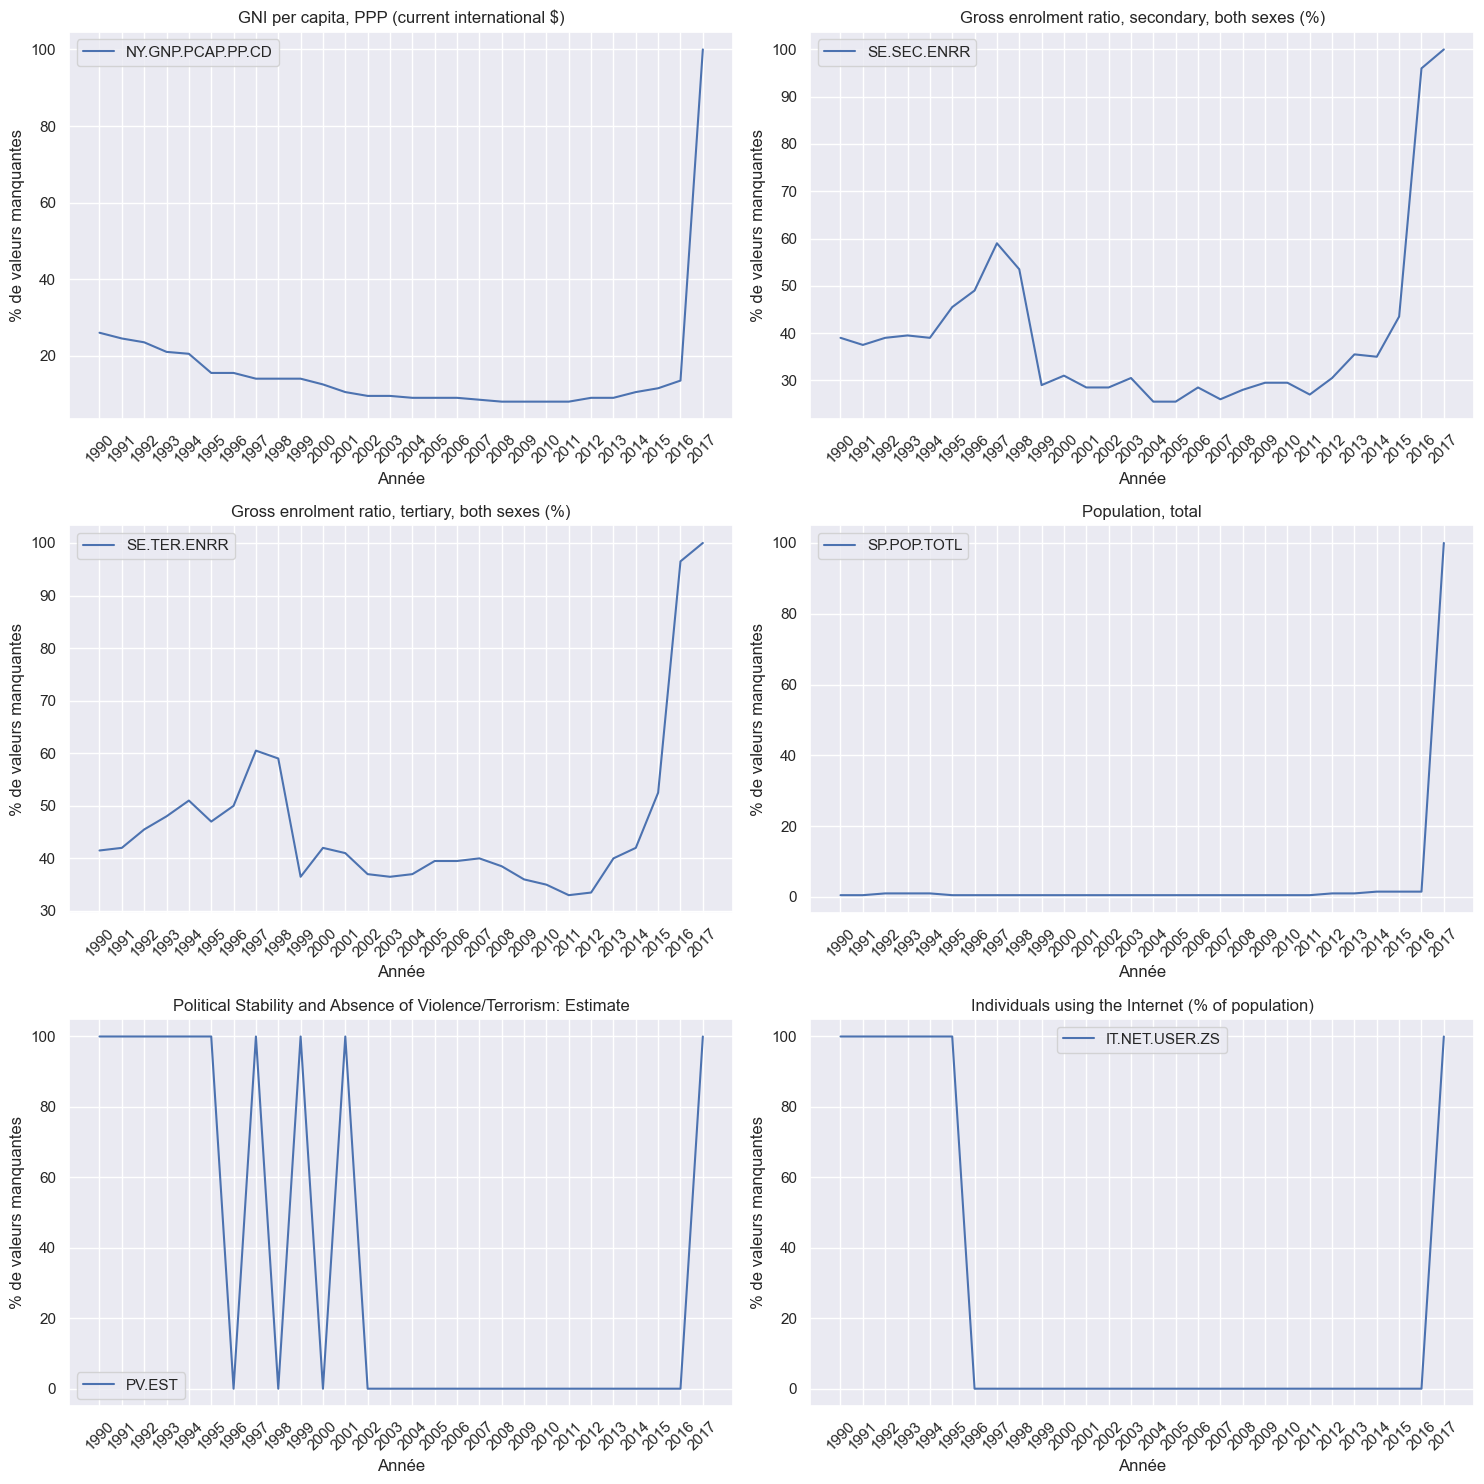

In [103]:
unique_indicators = df['Indicator Name'].unique()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, indicator in enumerate(unique_indicators):
    # Filtre les données pour l'indicateur 
    indicator_data = df[df['Indicator Name'] == indicator]

    # Filtre pour afficher l'indicateur sur chaque graphique
    indicator_code = indicator_data['Indicator Code'].iloc[0]
    
    # Calcul de pourcentages de valeurs manquantes par année pour chaque indicateur
    missing_percentage = indicator_data.isnull().mean() * 100
    
    # Filtre pour ne garder que les années
    missing_percentage_years = missing_percentage.loc['1990':'2017']
    
    # Création du graphique
    sns.lineplot(ax=axes[i], x=missing_percentage_years.index, y=missing_percentage_years.values, label=indicator_code)
    axes[i].set_title(indicator)
    axes[i].set_ylabel('% de valeurs manquantes')
    axes[i].set_xlabel('Année')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

On remarque différentes informations concernant le % de valeurs manquantes, on va les lister et prendre des décisions suite à cela.


Graphique 1
- A partir de 1996, il y a quasiment deux fois moins de valeurs manquantes

Graphiques 2 et 3
- Une certaine stabilité de valeurs disponibles à partir de 1999

Graphique 4
- Rien à signaler

Graphique 5
- Les années 1997, 1999 et 2001 ont 100% de valeurs manquantes. La raison est que ces données ne sont pas disponibles sur le site de la world bank, comme atteste [ce lien](https://databank.worldbank.org/source/worldwide-governance-indicators/Series/PV.EST)

Graphique 6
- Les données apparaissent à partir de l'année 1996 car notre df d'internet commence à partir de cette année pour être en accord avec celui de la stabilité politique. Tout de même, il est à noter que internet est réellement devenu public en 1993 avec le lancement du World Wide Web dans le domaine public d'après la [NPR](https://www.npr.org/2023/04/30/1172276538/world-wide-web-internet-anniversary) et autres sources.

Tous les graphiques
- L'année 2017 a l'air d'avoir 100% de valeurs manquantes peu importe l'indicateur.

Le but serait de scinder notre jeu de données en deux pour effectuer une meilleure analyse pour la suite. Une, concernant le passé et une autre concernant le futur.

Concernant le futur, cela peut servir à faire des projections pour les pays/régions qui pourraient nous intéresser.

Pour celui du passé, si on se réfère à nos % de valeurs manquantes, il serait plus intéressant de partir sur l'année 1996 ou 1999 pour commencer notre analyse du passé. Concernant les trois années manquantes de la stabilité politique, une imputation pourrait suffire. 

Le choix sera donc pour le df du passé : 1996-2016 et le futur 2020-2050.

## Scinder entre passé et futur

In [104]:
non_temporal_columns = ['Country Name', 'Country Code', 'Income Group', 'Region', 'Indicator Name', 'Indicator Code']

# Génération des colonnes pour le passé et futur
years_past = [str(year) for year in range(1996, 2017)]
years_future = [str(year) for year in range(2020, 2051)]

In [105]:
# Je sélectionne les colonnes pour le passé et le futur
columns_past = non_temporal_columns + years_past
columns_future = non_temporal_columns + years_future

In [106]:
# Je filtre les colonnes existantes pour s'assurer qu'elles sont présentes dans le df
columns_past_filtered = [col for col in columns_past if col in df.columns]
columns_future_filtered = [col for col in columns_future if col in df.columns]

In [107]:
# Je crée les df pour le passé et le futur avec les colonnes filtrées
df_past = df[columns_past_filtered]
df_future = df[columns_future_filtered]

In [108]:
df_past.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 125 to 1409
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    1210 non-null   object
 1   Country Code    1210 non-null   object
 2   Income Group    1204 non-null   object
 3   Region          1204 non-null   object
 4   Indicator Name  1210 non-null   object
 5   Indicator Code  1210 non-null   object
 6   1996            980 non-null    object
 7   1997            737 non-null    object
 8   1998            956 non-null    object
 9   1999            845 non-null    object
 10  2000            1038 non-null   object
 11  2001            844 non-null    object
 12  2002            1059 non-null   object
 13  2003            1056 non-null   object
 14  2004            1066 non-null   object
 15  2005            1061 non-null   object
 16  2006            1055 non-null   object
 17  2007            1060 non-null   object
 18  2008       

### Vérification des valeurs manquantes

In [109]:
# Calcul des pourcentages de valeurs manquantes par année
missing_percentage = (df_past.isnull().sum() / len(df_past)) * 100
missing_percentage

Country Name      0.000
Country Code      0.000
Income Group      0.496
Region            0.496
Indicator Name    0.000
Indicator Code    0.000
1996             19.008
1997             39.091
1998             20.992
1999             30.165
2000             14.215
2001             30.248
2002             12.479
2003             12.727
2004             11.901
2005             12.314
2006             12.810
2007             12.397
2008             12.397
2009             12.231
2010             12.066
2011             11.322
2012             12.231
2013             14.132
2014             14.711
2015             18.017
2016             34.298
dtype: float64

Pour les 30% qui apparaissent en 1997, 1999 et 2001, cela est dû au fait qu'il y a 100% de valeurs manquantes pour les données de la stabilité politique comme on a pu voir précédemment.

Pour effectuer au mieux l'analyse, je fais le choix de partir sur une année précise liée au passé qui aura le moins de % de valeurs manquantes. Cela amérliorera la fiabilité des informations.

Compte tenu des résultapartir sur les années 2002 à 2014 peuvent être intéressantes pour l'analyse sur les années du passé.nte.

# Validation des df finaux

## Passé

In [110]:
non_temporal_columns = ['Country Name', 'Country Code', 'Income Group', 'Region', 'Indicator Name', 'Indicator Code']

# Génération des colonnes pour le passé
years_past = [str(year) for year in range(2002, 2015)]

In [111]:
# Je sélectionne les colonnes pour le passé et le futur
columns_past = non_temporal_columns + years_past

In [112]:
# Je filtre les colonnes existantes pour s'assurer qu'elles sont présentes dans le df
columns_past_filtered = [col for col in columns_past if col in df.columns]

In [113]:
# Je crée les df pour le passé et le futur avec les colonnes filtrées
df_past = df[columns_past_filtered]

In [114]:
years_numeric_df_past = [col for col in df_past.columns if col.isdigit()]

for col in years_numeric_df_past:
    df_past[col] = pd.to_numeric(df_past[col], errors='coerce')

C:\Users\fryon\AppData\Local\Temp\ipykernel_15268\1226631818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_past[col] = pd.to_numeric(df_past[col], errors='coerce')


In [115]:
df_past.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 125 to 1409
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1210 non-null   object 
 1   Country Code    1210 non-null   object 
 2   Income Group    1204 non-null   object 
 3   Region          1204 non-null   object 
 4   Indicator Name  1210 non-null   object 
 5   Indicator Code  1210 non-null   object 
 6   2002            1033 non-null   float64
 7   2003            1035 non-null   float64
 8   2004            1052 non-null   float64
 9   2005            1048 non-null   float64
 10  2006            1042 non-null   float64
 11  2007            1052 non-null   float64
 12  2008            1051 non-null   float64
 13  2009            1053 non-null   float64
 14  2010            1054 non-null   float64
 15  2011            1067 non-null   float64
 16  2012            1054 non-null   float64
 17  2013            1032 non-null   floa

In [116]:
df_past_to_csv = df_past.to_csv('Data/EdStatsFinalPast.csv', index=False)

## Futur

In [117]:
df_future

,Country Name,Country Code,Income Group,Region,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050
125,Afghanistan,AFG,Low income,South Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,Afghanistan,AFG,Low income,South Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Afghanistan,AFG,Low income,South Asia,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,Afghanistan,AFG,Low income,South Asia,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,Afghanistan,AFG,Low income,South Asia,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,Zimbabwe,ZWE,Low income,Sub-Saharan Africa,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406,Zimbabwe,ZWE,Low income,Sub-Saharan Africa,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407,Zimbabwe,ZWE,Low income,Sub-Saharan Africa,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1408,Zimbabwe,ZWE,Low income,Sub-Saharan Africa,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,NaN
